In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

import os

os.chdir(r"C:\Users\Gnaneeswar\Desktop\Hackathons\Predict Restaurant Food Prices")
os.getcwd()

'C:\\Users\\Gnaneeswar\\Desktop\\Hackathons\\Predict Restaurant Food Prices'

In [2]:
frame_main=pd.read_excel('Data_Train.xlsx')

test1=pd.read_excel("Data_Test.xlsx")
test1.head()

TITLE  RESTAURANT_ID                                      CUISINES  \
0  CASUAL DINING           4085         North Indian, Chinese, Mughlai, Kebab   
1    QUICK BITES          12680  South Indian, Fast Food, Pizza, North Indian   
2  CASUAL DINING           1411       North Indian, Seafood, Biryani, Chinese   
3           None            204                                       Biryani   
4    QUICK BITES          13453                          South Indian, Kerala   

                                                TIME       CITY      LOCALITY  \
0                      12noon – 12midnight (Mon-Sun)      Noida     Sector 18   
1                            7am – 12:30AM (Mon-Sun)     Mumbai    Grant Road   
2                           11am – 11:30pm (Mon-Sun)     Mumbai  Marine Lines   
3  9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...  Faridabad           NIT   
4                              11am – 10pm (Mon-Sun)      Kochi        Kaloor   

  RATING       VOTES  
0    4.3   564 votes  
1    4.2    61 votes  
2    3.8   350 votes  
3    3.8  1445 votes  
4    3.6    23 votes

In [261]:
frame_main.isnull().sum()

title               0
restaurant_id       0
cuisines            0
time                0
city              112
locality           98
rating              0
votes            1204
cost                0
dtype: int64

In [271]:
for i in frame_main.rating:
    try:
        float(i)
    except:
        print(i)

In [270]:
frame_main.rating.replace("NEW", 0, inplace=True)

In [273]:
frame_main.rating=frame_main.rating.astype(float)

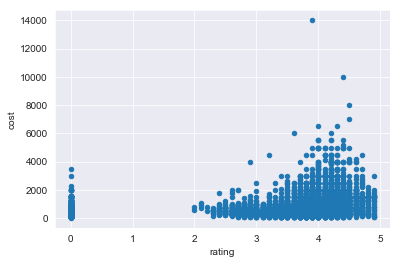

In [274]:
frame_main.plot(kind="scatter",x="rating",y="cost")
plt.show()

In [3]:
frame_main.shape

(12690, 9)

In [4]:
frame_main.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [3]:
frame_main.columns = [x.lower() for x in frame_main.columns]
frame_main.columns


Index(['title', 'restaurant_id', 'cuisines', 'time', 'city', 'locality',
       'rating', 'votes', 'cost'],
      dtype='object')

In [4]:
test1.columns = [x.lower() for x in test1.columns]
test1.columns

Index(['title', 'restaurant_id', 'cuisines', 'time', 'city', 'locality',
       'rating', 'votes'],
      dtype='object')

In [5]:
frame_main.dtypes

title            object
restaurant_id     int64
cuisines         object
time             object
city             object
locality         object
rating           object
votes            object
cost              int64
dtype: object

In [6]:
frame_main.head()

title  restaurant_id  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     cuisines  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     time     city        locality rating  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Parel    3.8   

       votes  cost  
0   49 votes  1200  
1   30 votes  1500  
2  221 votes   800  
3   24 votes   800  
4  165 votes   300

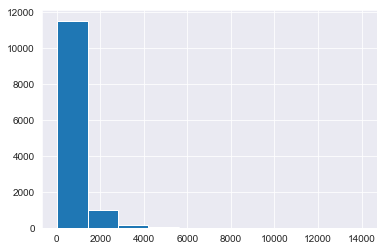

In [12]:
# Plot histogram grid
frame_main.cost.hist()
figsize=(30,30)
# Clear the text "residue"
plt.show()

In [14]:
frame_main.describe(include=['object'])

title      cuisines                   time     city    locality  \
count         12690         12690                  12690    12578       12592   
unique          113          4155                   2689      359        1416   
top     QUICK BITES  South Indian  11am – 11pm (Mon-Sun)  Chennai  Gachibowli   
freq           4218           532                   1415     2174         166   

       rating     votes  
count   12688     11486  
unique     32      1847  
top       3.9  44 votes  
freq     1238        71

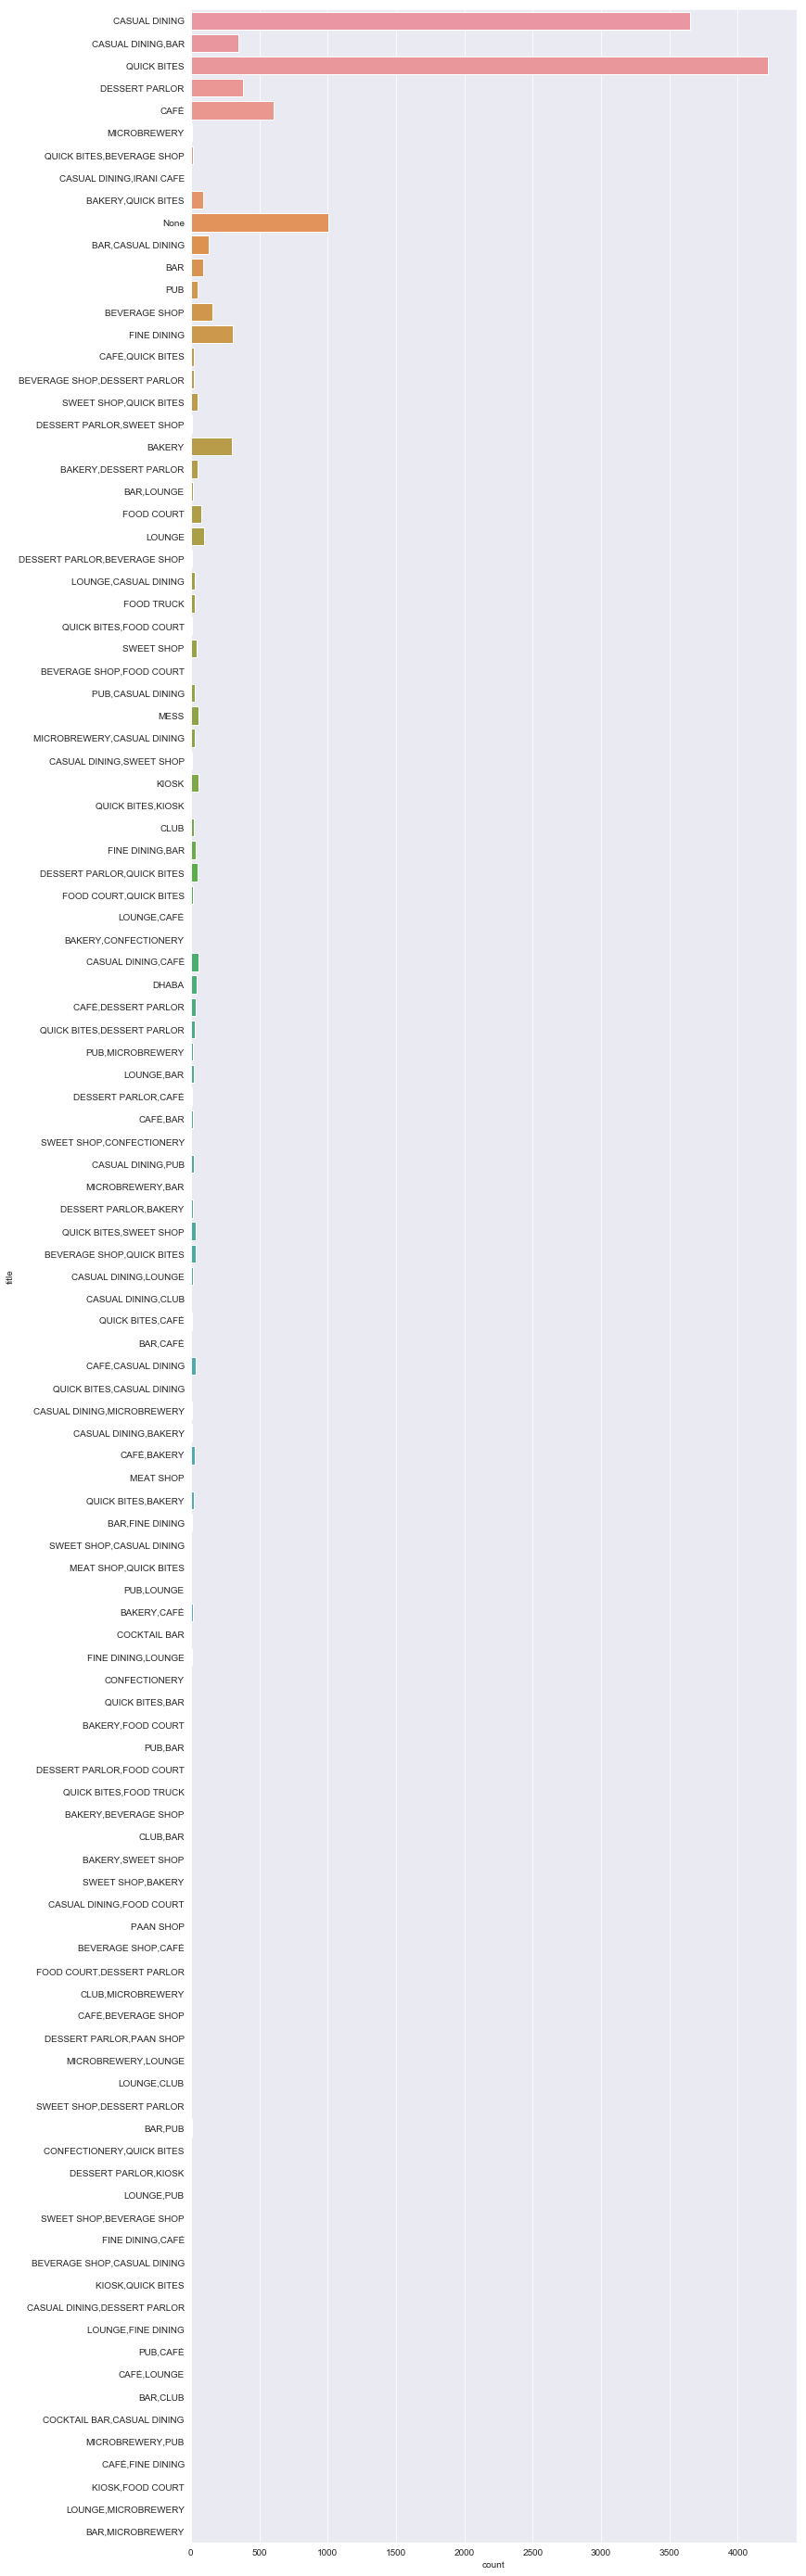

In [24]:
sns.countplot(y='title', data=frame_main)
plt.figure(figsize=(15,50))
plt.show()

In [7]:
frame_main.city=frame_main.city.str.lower().str.strip()
frame_main.title=frame_main.title.str.lower().str.strip()
frame_main.cuisines=frame_main.cuisines.str.lower().str.strip()
frame_main.locality=frame_main.locality.str.lower().str.strip()

test1.city=test1.city.str.lower().str.strip()
test1.title=test1.title.str.lower().str.strip()
test1.cuisines=test1.cuisines.str.lower().str.strip()
test1.locality=test1.locality.str.lower().str.strip()

In [9]:
#frame.boxplot(column='cost', notch=True, grid=False, figsize=(20,5), vert=False)
# restuarant prices city wise
#frame.groupby("city").hist(column="cost", bins=10)
#plt.show()

In [10]:
#frame.title = [sorted(x.split(",",5)) for x in frame.title]

In [8]:
frame=frame_main.copy()

In [9]:
frame["subtitle"]=frame["title"]
frame["title"]=frame['title'].str.split(',', 3, expand=True)[0]
frame["subtitle"]=frame['subtitle'].str.split(',', 3, expand=True)[1]
#frame["special"]= frame['special'].str.split(',', 1).str[1]

test1["subtitle"]=test1["title"]
test1["title"]=test1['title'].str.split(',', 3, expand=True)[0]
test1["subtitle"]=test1['subtitle'].str.split(',', 3, expand=True)[1]

In [10]:
frame.loc[frame.subtitle.isnull(),"subtitle"]="no"
test1.loc[test1.subtitle.isnull(),"subtitle"]="no"

In [14]:
frame.head()

title  restaurant_id                                    cuisines  \
0   casual dining           9438                 malwani, goan, north indian   
1   casual dining          13198              asian, modern indian, japanese   
2   casual dining          10915  north indian, chinese, biryani, hyderabadi   
3     quick bites           6346                            tibetan, chinese   
4  dessert parlor          15387                                    desserts   

                                     time     city        locality rating  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    thane  dombivali east    3.6   
1                    6pm – 11pm (Mon-Sun)  chennai       ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  chennai      saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   mumbai     bandra west    4.1   
4                    11am – 1am (Mon-Sun)   mumbai     lower parel    3.8   

       votes  cost subtitle  
0   49 votes  1200       no  
1   30 votes  1500      bar  
2  221 votes   800       no  
3   24 votes   800       no  
4  165 votes   300       no

In [27]:
test1.head()

title  restaurant_id                                      cuisines  \
0  casual dining           4085         north indian, chinese, mughlai, kebab   
1    quick bites          12680  south indian, fast food, pizza, north indian   
2  casual dining           1411       north indian, seafood, biryani, chinese   
3           none            204                                       biryani   
4    quick bites          13453                          south indian, kerala   

                                                time       city      locality  \
0                      12noon – 12midnight (Mon-Sun)      noida     sector 18   
1                            7am – 12:30AM (Mon-Sun)     mumbai    grant road   
2                           11am – 11:30pm (Mon-Sun)     mumbai  marine lines   
3  9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...  faridabad           nit   
4                              11am – 10pm (Mon-Sun)      kochi        kaloor   

  rating       votes subtitle  
0    4.3   564 votes       no  
1    4.2    61 votes       no  
2    3.8   350 votes       no  
3    3.8  1445 votes       no  
4    3.6    23 votes       no

In [278]:
frame.describe(include=['object'])

title      cuisines                   time     city    locality  \
count         12690         12690                  12690    12578       12592   
unique           23          4155                   2689      354        1398   
top     quick bites  south indian  11am – 11pm (Mon-Sun)  chennai  gachibowli   
freq           4337           532                   1415     2175         166   

       rating     votes subtitle  
count   12688     11486     1482  
unique     32      1847       19  
top       3.9  44 votes      bar  
freq     1238        71      428

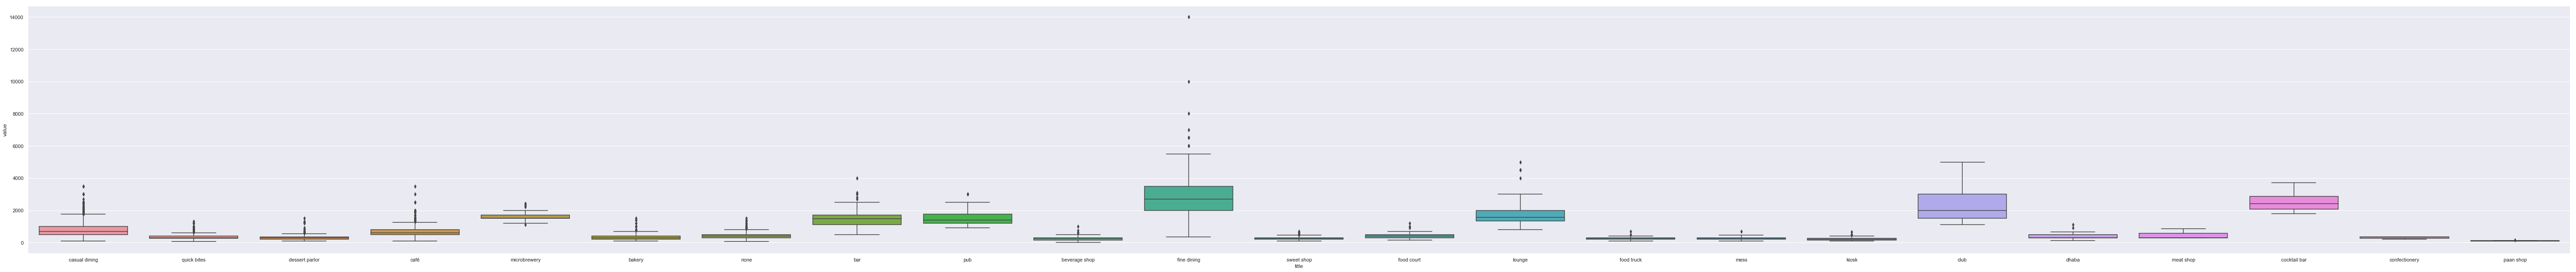

In [44]:

#sns.set(rc={'figure.figsize':(100,20)})

df=pd.melt(frame,id_vars=['title'],value_vars=["cost"])
plt.figure(figsize=(100,10))
sns.boxplot(x='title',y='value',data=df)
plt.show()
   

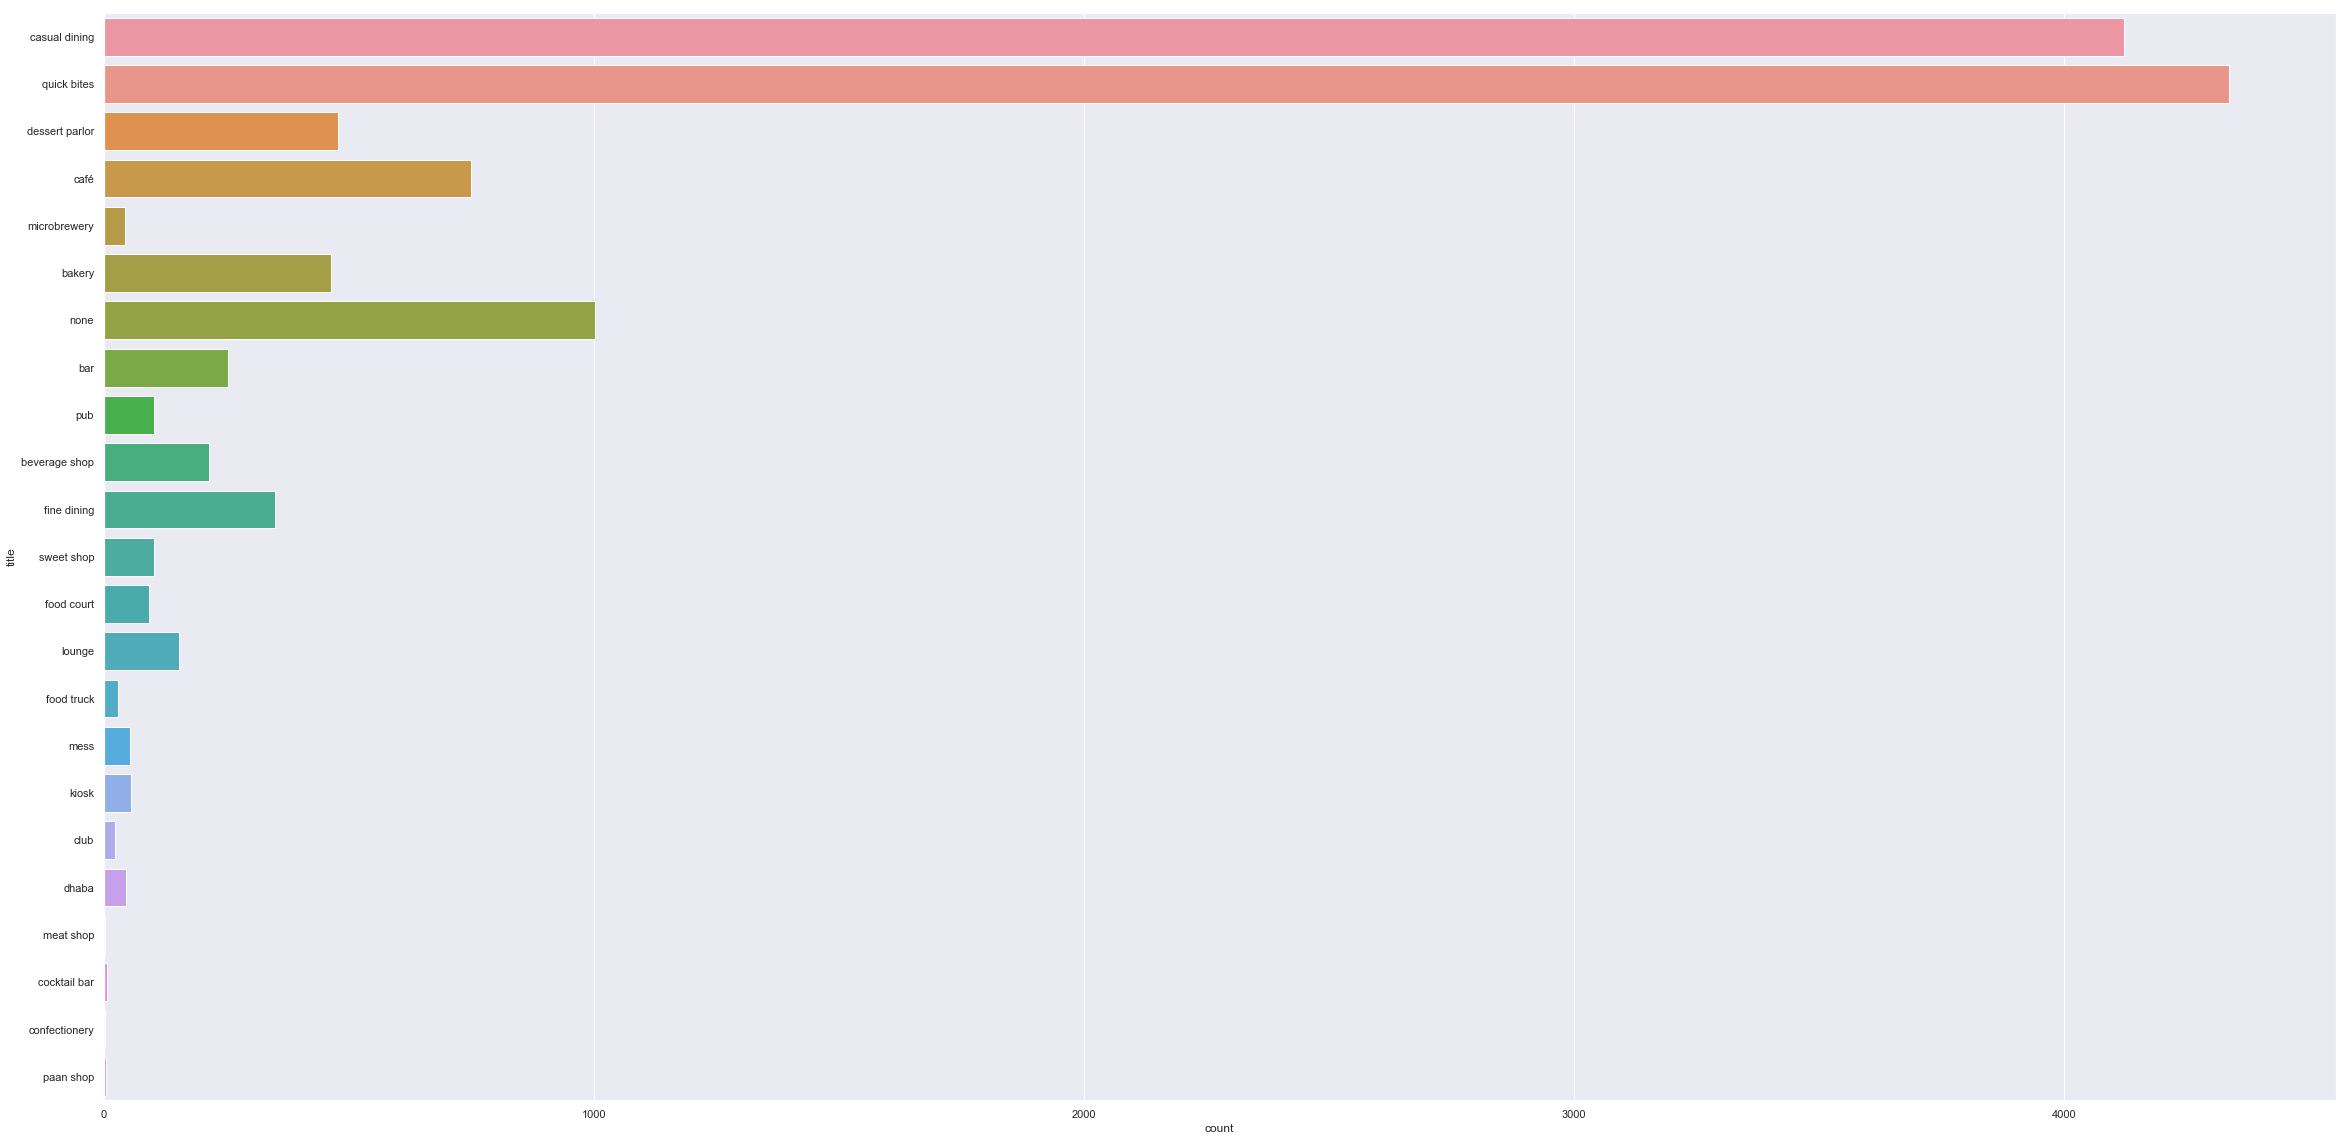

<Figure size 5040x1440 with 0 Axes>

In [49]:
sns.countplot(y='restaurant_id', data=frame)
plt.figure(figsize=(70,20))
plt.show() 

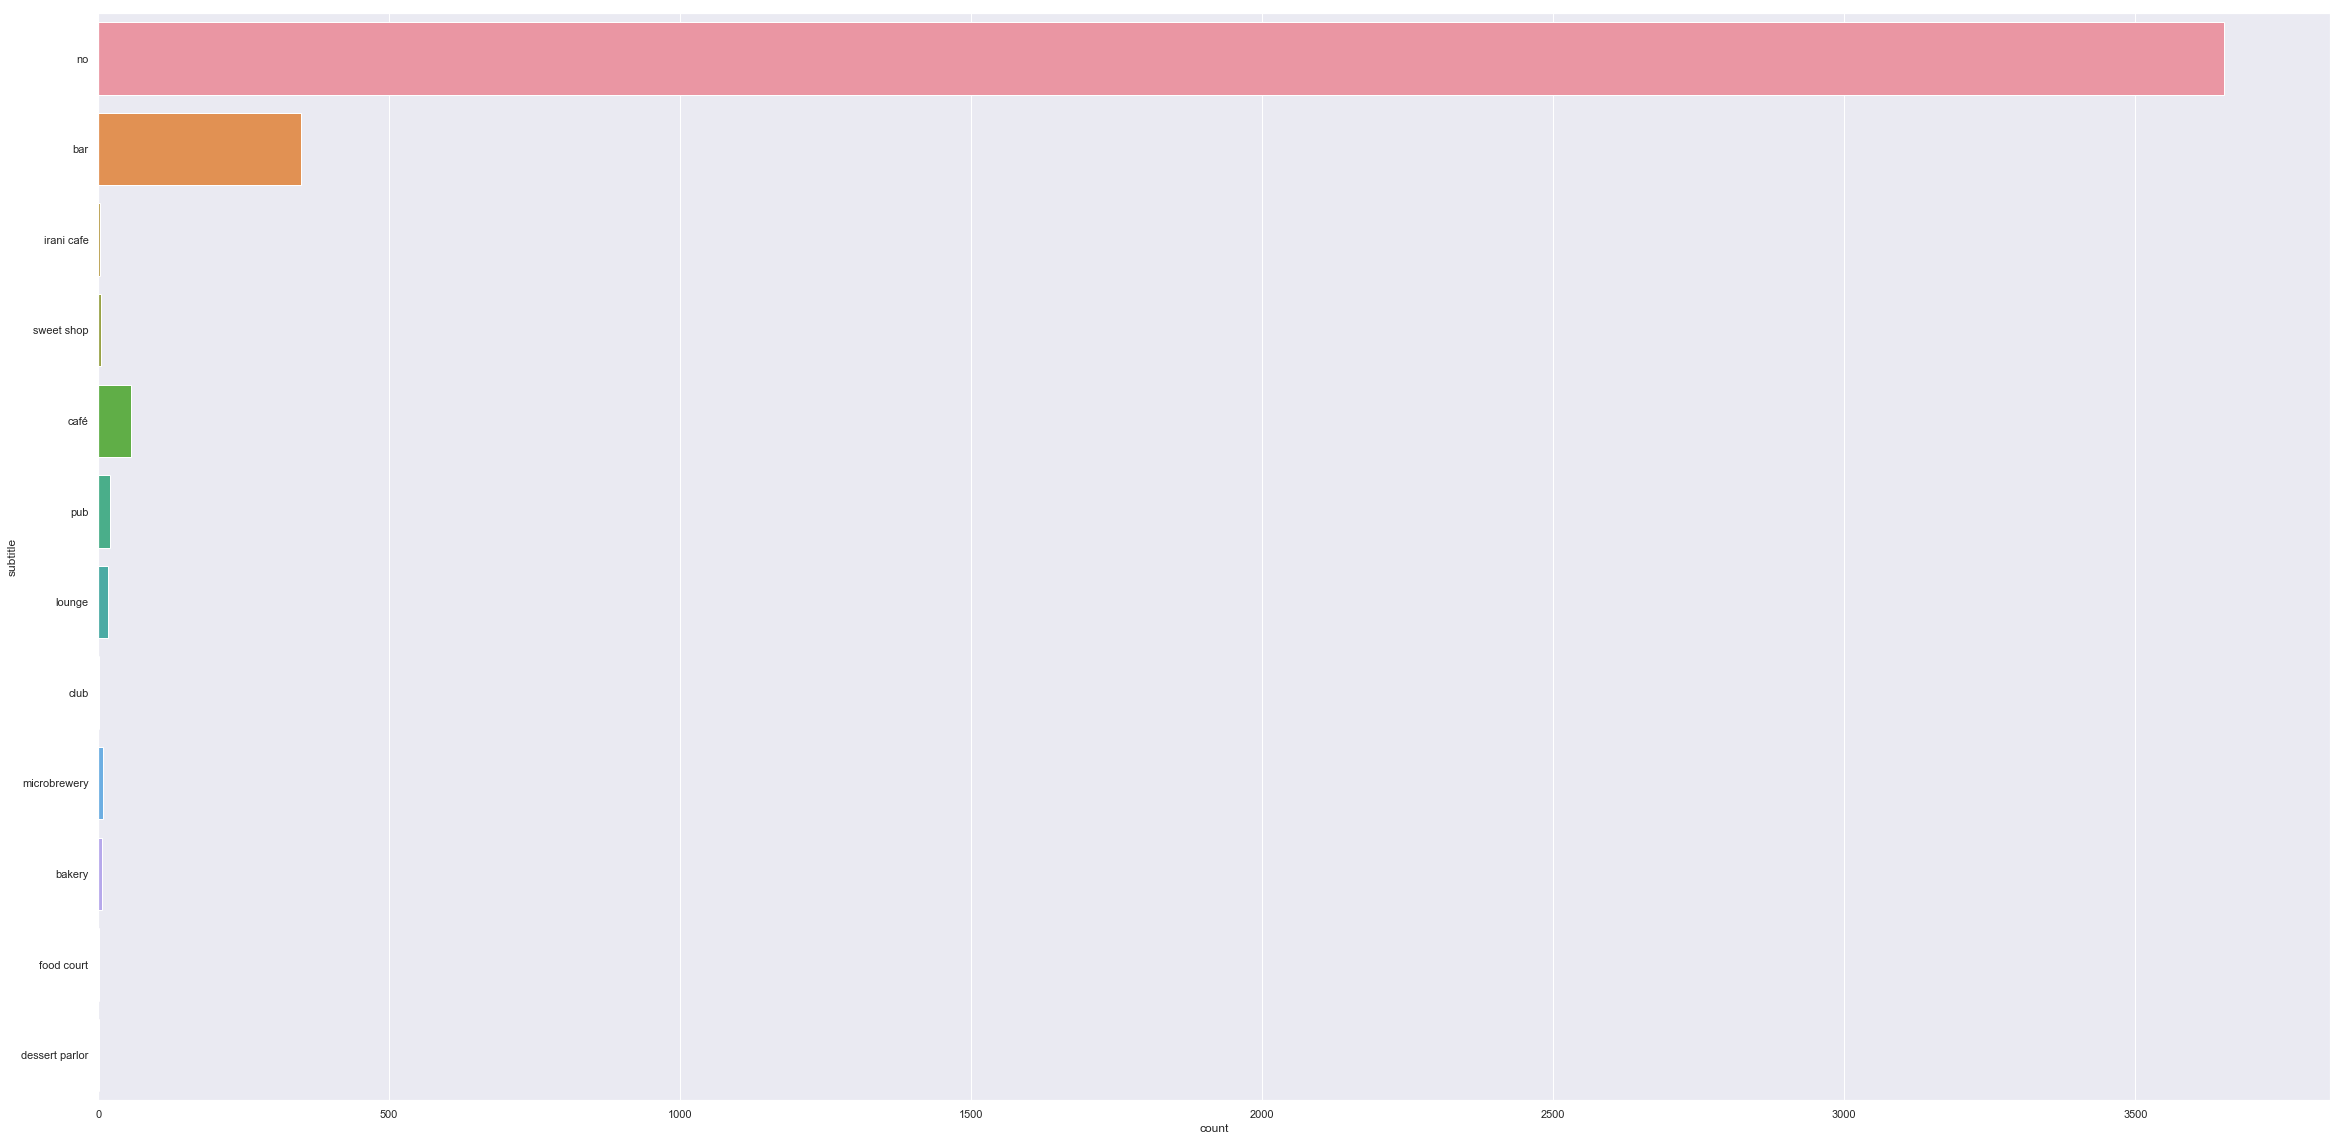

<Figure size 5040x1440 with 0 Axes>

In [59]:
sns.countplot(y='subtitle', data=frame[frame.title=="casual dining"])
plt.figure(figsize=(70,20))
plt.show()

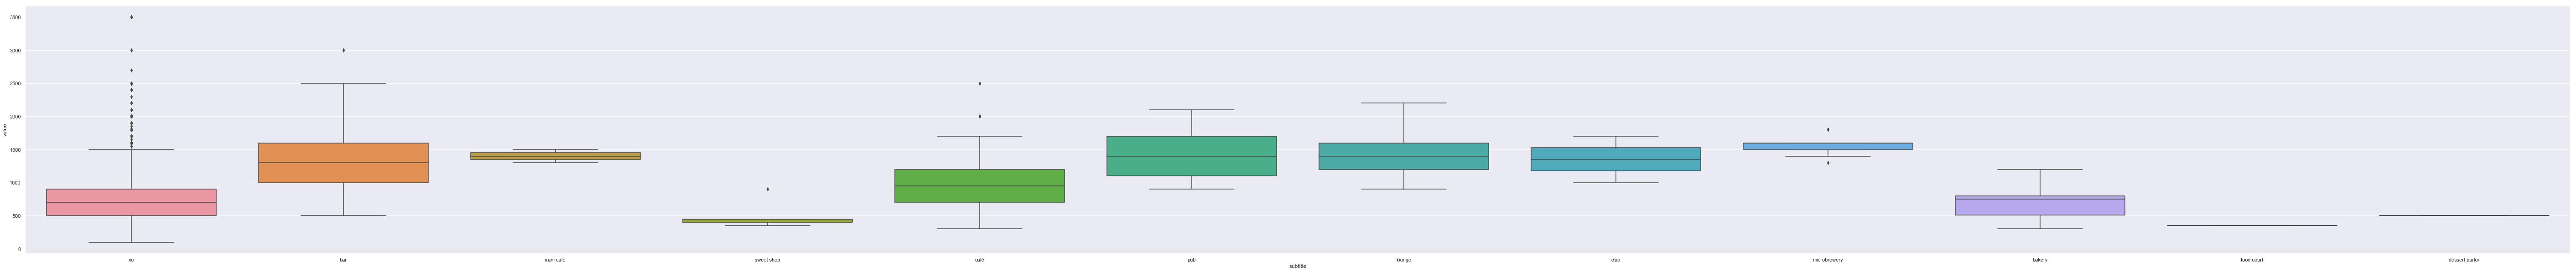

In [58]:
df=pd.melt(frame[frame.title=="casual dining"],id_vars=['subtitle'],value_vars=["cost"])
plt.figure(figsize=(100,10))
sns.boxplot(x='subtitle',y='value',data=df)
plt.show()
   

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000B60C02B208>],
      dtype=object)

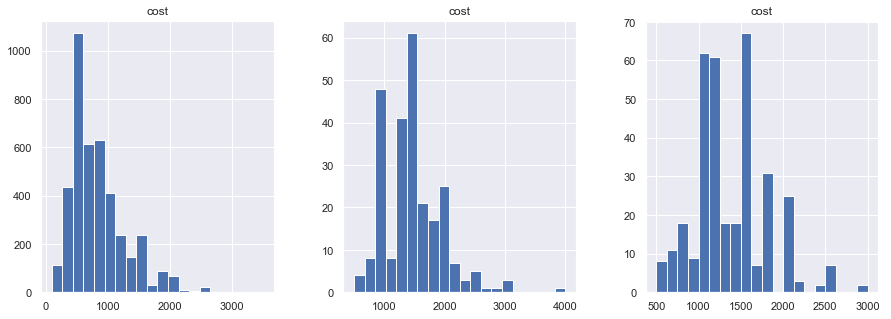

In [110]:
# we can conclude that Bar is the dominant type. So for restaurants having bar as subtitle, main title should be bar

sns.set(rc={'figure.figsize':(15,5)})

plt.figure(1)
ax1 = plt.subplot(131)

frame[frame.title=="casual dining"].hist(column="cost",ax=ax1,bins=20)

ax2 = plt.subplot(132)
frame[frame.title=="bar"].hist(column="cost",ax=ax2,bins=20)

ax3 = plt.subplot(133)
frame[(frame.title=="casual dining")&(frame.subtitle=="bar")].hist(column="cost",ax=ax3,bins=20)

<Figure size 1080x360 with 0 Axes>

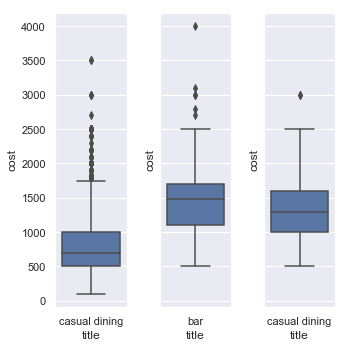

In [111]:
#sns.set(rc={'figure.figsize':(5,5)})

plt.figure(1)

fig, axes = pyplot.subplots(ncols=3, figsize=(5, 5), sharey=True)

sns.boxplot(x='title',y='cost',data=frame[frame.title=="casual dining"],ax=axes[0])

sns.boxplot(x='title',y='cost',data=frame[frame.title=="bar"],ax=axes[1])

sns.boxplot(x='title',y='cost',data=frame[(frame.title=="casual dining")&(frame.subtitle=="bar")],ax=axes[2])

plt.tight_layout()






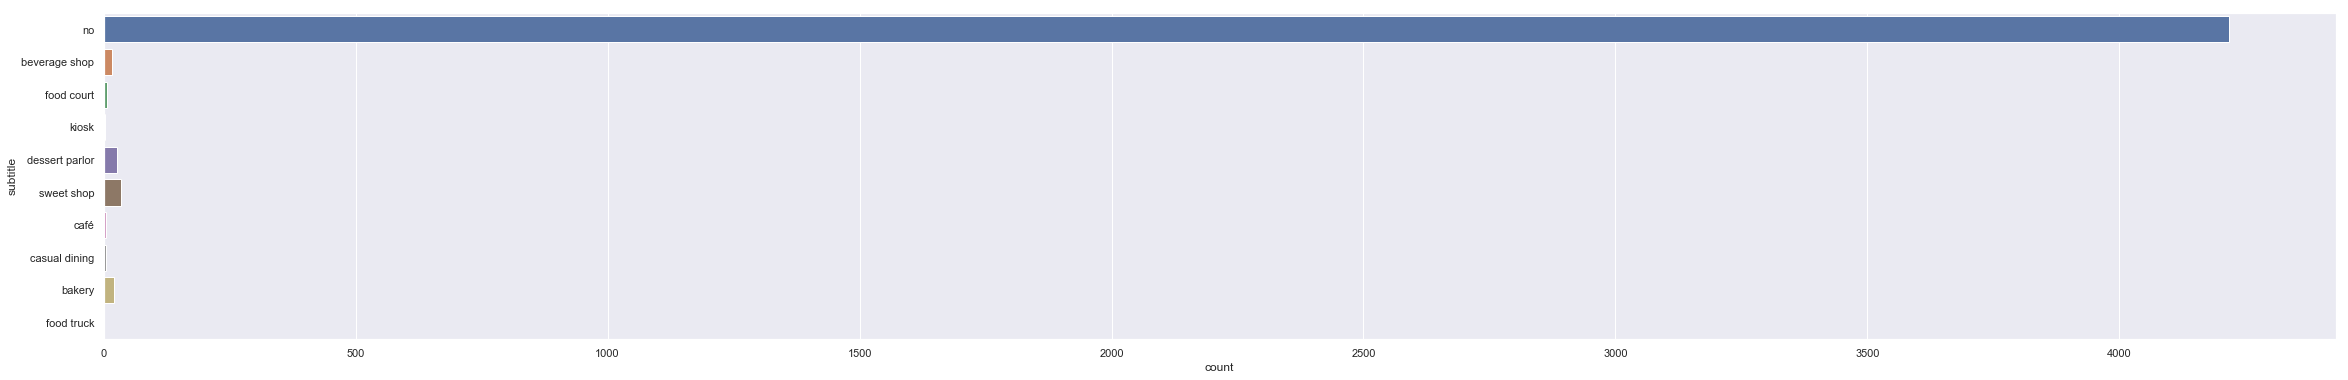

<Figure size 5040x1440 with 0 Axes>

In [138]:
sns.countplot(y='subtitle', data=frame1[frame1.title=="quick bites"])
plt.figure(figsize=(70,20))
plt.show()

In [ ]:
# Rank List as of now
""""
1. Fine Dining
2. Club, Cocktailbar
3. Pub,Bar,Lounge, Microbrewary
4. dessertparlor and quickbites and sweetshop
5. Cafe is dominant than bakery


In [11]:
frame1=frame.copy()

In [12]:
frame1.loc[(frame1.title=="fine dining")|(frame1.subtitle=="fine dining"),"title"]="fine dining"
frame1.loc[(frame1.title=="fine dining")|(frame1.subtitle=="fine dining"),"subtitle"]="no"

frame1.loc[(frame1.title=="club")|(frame1.subtitle=="club"),"title"]="club"
frame1.loc[(frame1.title=="club")|(frame1.subtitle=="club"),"subtitle"]="no"

frame1.loc[(frame1.title=="cocktail bar")|(frame1.subtitle=="cocktail bar"),"title"]="club"
frame1.loc[(frame1.title=="cocktail bar")|(frame1.subtitle=="cocktail bar"),"subtitle"]="no"

frame1.loc[(frame1.title=="bar")|(frame1.subtitle=="bar"),"title"]="bar"
frame1.loc[(frame1.title=="bar")|(frame1.subtitle=="bar"),"subtitle"]="no"

frame1.loc[(frame1.title=="pub")|(frame1.subtitle=="pub"),"title"]="bar"
frame1.loc[(frame1.title=="pub")|(frame1.subtitle=="pub"),"subtitle"]="no"

frame1.loc[(frame1.title=="lounge")|(frame1.subtitle=="lounge"),"title"]="bar"
frame1.loc[(frame1.title=="lounge")|(frame1.subtitle=="lounge"),"subtitle"]="no"

frame1.loc[(frame1.title=="microbrewery")|(frame1.subtitle=="microbrewery"),"title"]="bar"
frame1.loc[(frame1.title=="microbrewery")|(frame1.subtitle=="microbrewery"),"subtitle"]="no"


frame1.loc[(frame1.title=="dessert parlor")|(frame1.subtitle=="dessert parlor"),"title"]="quick bites"
frame1.loc[(frame1.title=="dessert parlor")|(frame1.subtitle=="dessert parlor"),"subtitle"]="no"

frame1.loc[(frame1.title=="quick bites")|(frame1.subtitle=="quick bites"),"title"]="quick bites"
frame1.loc[(frame1.title=="quick bites")|(frame1.subtitle=="quick bites"),"subtitle"]="no"

frame1.loc[(frame1.title=="sweet shop")|(frame1.subtitle=="sweet shop"),"title"]="quick bites"
frame1.loc[(frame1.title=="sweet shop")|(frame1.subtitle=="sweet shop"),"subtitle"]="no"

frame1.loc[(frame1.title=="food truck")|(frame1.subtitle=="food truck"),"title"]="mess"
frame1.loc[(frame1.title=="food truck")|(frame1.subtitle=="food truck"),"subtitle"]="no"

frame1.loc[(frame1.title=="mess")|(frame1.subtitle=="mess"),"title"]="mess"
frame1.loc[(frame1.title=="mess")|(frame1.subtitle=="mess"),"subtitle"]="no"

frame1.loc[(frame1.title=="kiosk")|(frame1.subtitle=="kiosk"),"title"]="mess"
frame1.loc[(frame1.title=="kiosk")|(frame1.subtitle=="kiosk"),"subtitle"]="no"

frame1.loc[(frame1.title=="café")|(frame1.subtitle=="café"),"title"]="café"
frame1.loc[(frame1.title=="café")|(frame1.subtitle=="café"),"subtitle"]="no"

frame1.loc[(frame1.title=="bakery")|(frame1.subtitle=="bakery"),"title"]="bakery"
frame1.loc[(frame1.title=="bakery")|(frame1.subtitle=="bakery"),"subtitle"]="no"

frame1.loc[(frame1.title=="confectionery")|(frame1.subtitle=="confectionery"),"title"]="bakery"
frame1.loc[(frame1.title=="confectionery")|(frame1.subtitle=="confectionery"),"subtitle"]="no"

frame1.loc[(frame1.title=="meat shop")|(frame1.subtitle=="meat shop"),"title"]="dhaba"
frame1.loc[(frame1.title=="meat shop")|(frame1.subtitle=="meat shop"),"subtitle"]="no"

frame1.loc[(frame1.title=="casual dining")|(frame1.subtitle=="casual dining"),"title"]="casual dining"
frame1.loc[(frame1.title=="casual dining")|(frame1.subtitle=="casual dining"),"subtitle"]="no"



In [13]:
test1.loc[(test1.title=="fine dining")|(test1.subtitle=="fine dining"),"title"]="fine dining"
test1.loc[(test1.title=="fine dining")|(test1.subtitle=="fine dining"),"subtitle"]="no"

test1.loc[(test1.title=="club")|(test1.subtitle=="club"),"title"]="club"
test1.loc[(test1.title=="club")|(test1.subtitle=="club"),"subtitle"]="no"

test1.loc[(test1.title=="cocktail bar")|(test1.subtitle=="cocktail bar"),"title"]="club"
test1.loc[(test1.title=="cocktail bar")|(test1.subtitle=="cocktail bar"),"subtitle"]="no"

test1.loc[(test1.title=="bar")|(test1.subtitle=="bar"),"title"]="bar"
test1.loc[(test1.title=="bar")|(test1.subtitle=="bar"),"subtitle"]="no"

test1.loc[(test1.title=="pub")|(test1.subtitle=="pub"),"title"]="bar"
test1.loc[(test1.title=="pub")|(test1.subtitle=="pub"),"subtitle"]="no"

test1.loc[(test1.title=="lounge")|(test1.subtitle=="lounge"),"title"]="bar"
test1.loc[(test1.title=="lounge")|(test1.subtitle=="lounge"),"subtitle"]="no"

test1.loc[(test1.title=="microbrewery")|(test1.subtitle=="microbrewery"),"title"]="bar"
test1.loc[(test1.title=="microbrewery")|(test1.subtitle=="microbrewery"),"subtitle"]="no"


test1.loc[(test1.title=="dessert parlor")|(test1.subtitle=="dessert parlor"),"title"]="quick bites"
test1.loc[(test1.title=="dessert parlor")|(test1.subtitle=="dessert parlor"),"subtitle"]="no"

test1.loc[(test1.title=="quick bites")|(test1.subtitle=="quick bites"),"title"]="quick bites"
test1.loc[(test1.title=="quick bites")|(test1.subtitle=="quick bites"),"subtitle"]="no"

test1.loc[(test1.title=="sweet shop")|(test1.subtitle=="sweet shop"),"title"]="quick bites"
test1.loc[(test1.title=="sweet shop")|(test1.subtitle=="sweet shop"),"subtitle"]="no"

test1.loc[(test1.title=="food truck")|(test1.subtitle=="food truck"),"title"]="mess"
test1.loc[(test1.title=="food truck")|(test1.subtitle=="food truck"),"subtitle"]="no"

test1.loc[(test1.title=="mess")|(test1.subtitle=="mess"),"title"]="mess"
test1.loc[(test1.title=="mess")|(test1.subtitle=="mess"),"subtitle"]="no"

test1.loc[(test1.title=="kiosk")|(test1.subtitle=="kiosk"),"title"]="mess"
test1.loc[(test1.title=="kiosk")|(test1.subtitle=="kiosk"),"subtitle"]="no"

test1.loc[(test1.title=="café")|(test1.subtitle=="café"),"title"]="café"
test1.loc[(test1.title=="café")|(test1.subtitle=="café"),"subtitle"]="no"

test1.loc[(test1.title=="bakery")|(test1.subtitle=="bakery"),"title"]="bakery"
test1.loc[(test1.title=="bakery")|(test1.subtitle=="bakery"),"subtitle"]="no"

test1.loc[(test1.title=="confectionery")|(test1.subtitle=="confectionery"),"title"]="bakery"
test1.loc[(test1.title=="confectionery")|(test1.subtitle=="confectionery"),"subtitle"]="no"

test1.loc[(test1.title=="meat shop")|(test1.subtitle=="meat shop"),"title"]="dhaba"
test1.loc[(test1.title=="meat shop")|(test1.subtitle=="meat shop"),"subtitle"]="no"

test1.loc[(test1.title=="casual dining")|(test1.subtitle=="casual dining"),"title"]="casual dining"
test1.loc[(test1.title=="casual dining")|(test1.subtitle=="casual dining"),"subtitle"]="no"



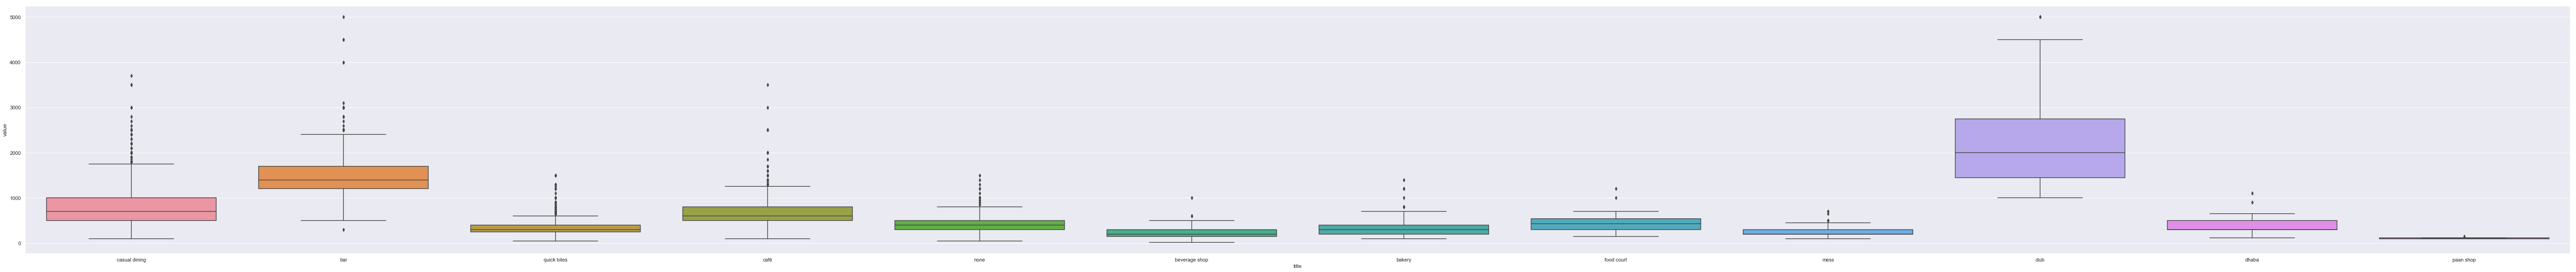

In [205]:
df=pd.melt(frame1[frame1.title!="fine dining"],id_vars=['title'],value_vars=["cost"])
plt.figure(figsize=(100,10))
sns.boxplot(x='title',y='value',data=df)
plt.show()
   

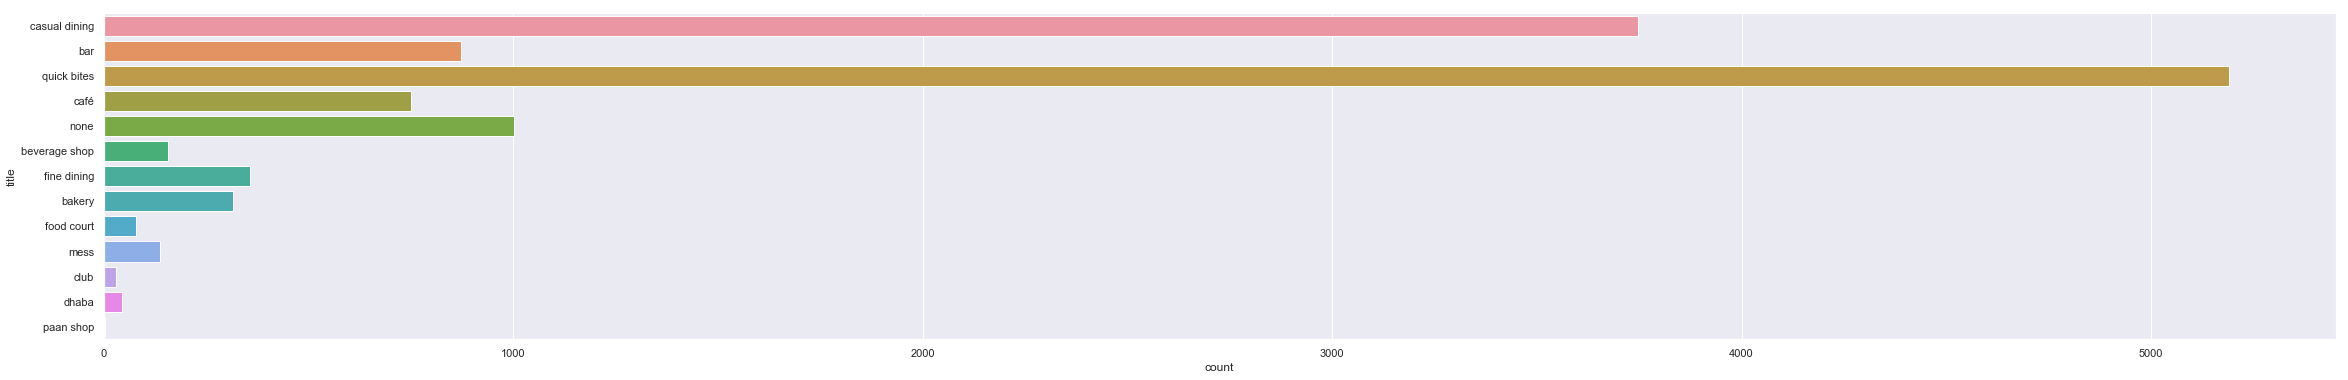

<Figure size 5040x1440 with 0 Axes>

In [206]:
sns.countplot(y='title', data=frame1)
plt.figure(figsize=(70,20))
plt.show()

In [221]:
frame1.groupby("cuisines").count()["title"][frame1.groupby("cuisines").count()["title"]>10]

cuisines
andhra                                  27
arabian                                 80
bakery                                 148
bakery, desserts                       148
bakery, desserts, fast food             29
bakery, fast food                       79
bakery, fast food, desserts             22
beverages                               55
beverages, fast food                    28
biryani                                129
biryani, chinese                        21
biryani, north indian                   46
biryani, north indian, chinese          44
burger, fast food                       32
cafe                                   134
cafe, continental                       23
cafe, desserts                          32
cafe, fast food                         35
chinese                                167
chinese, fast food                      31
chinese, momos                          54
chinese, north indian                  119
chinese, north indian, biryani          23
ch

In [14]:
for i in range(0,8):
    
    frame1['cuisines'+str(i)]=frame1['cuisines'].str.rstrip(",").str.split(',', 7, expand=True)[i].str.strip()

In [15]:
for i in range(0,8):
    
    test1['cuisines'+str(i)]=test1['cuisines'].str.rstrip(",").str.split(',', 7, expand=True)[i].str.strip()

In [16]:
for i in range(0,8):
    
    frame1["cuisines"+str(i)].replace('malwani', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('maharashtrian', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('gujarati', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('bihari', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('indian', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('bengali', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('mughlai', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('rajasthani', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('morden indian', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('sindhi', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('kashmiri', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('north eastern', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('afghan', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('assamese', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('awadhi', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('lucknowi', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('modern indian', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('pakistani', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('goan', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('briyani', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('nepalese', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('sindhi', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('kebab', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('biryani', 'north indian', inplace=True)
    frame1["cuisines"+str(i)].replace('mithai', 'north indian', inplace=True)
    
    frame1["cuisines"+str(i)].replace('coffee', 'drinks', inplace=True)
    frame1["cuisines"+str(i)].replace('tea', 'drinks', inplace=True)
    frame1["cuisines"+str(i)].replace('juices', 'drinks', inplace=True)
    frame1["cuisines"+str(i)].replace('bubble tea', 'drinks', inplace=True)
    

    
   
    
    frame1["cuisines"+str(i)].replace('andhra', 'south indian', inplace=True)
    frame1["cuisines"+str(i)].replace('kerala', 'south indian', inplace=True)
    frame1["cuisines"+str(i)].replace('hyderabadi', 'south indian', inplace=True)
    frame1["cuisines"+str(i)].replace('chettinad', 'south indian', inplace=True)
    frame1["cuisines"+str(i)].replace('oriya', 'south indian', inplace=True)
    frame1["cuisines"+str(i)].replace('mangalorean', 'south indian', inplace=True)
    frame1["cuisines"+str(i)].replace('sri lankan', 'south indian', inplace=True)
    frame1["cuisines"+str(i)].replace('konkan', 'south indian', inplace=True)
    frame1["cuisines"+str(i)].replace('mangalorean', 'south indian', inplace=True)
    frame1["cuisines"+str(i)].replace('tamil', 'south indian', inplace=True)
    
    frame1["cuisines"+str(i)].replace('burger', 'american', inplace=True)
    frame1["cuisines"+str(i)].replace('pizza', 'american', inplace=True)
    frame1["cuisines"+str(i)].replace('steak', 'american', inplace=True)
    frame1["cuisines"+str(i)].replace('burger', 'american', inplace=True)
    frame1["cuisines"+str(i)].replace('bbq', 'american', inplace=True)
    frame1["cuisines"+str(i)].replace('finger food', 'american', inplace=True)
    frame1["cuisines"+str(i)].replace('hot dogs', 'american', inplace=True)
    frame1["cuisines"+str(i)].replace('sandwich', 'american', inplace=True)
    frame1["cuisines"+str(i)].replace('salad', 'american', inplace=True)


    
    frame1["cuisines"+str(i)].replace('italian', 'european', inplace=True)
    frame1["cuisines"+str(i)].replace('french', 'european', inplace=True)
    frame1["cuisines"+str(i)].replace('mediterranean', 'european', inplace=True)
    frame1["cuisines"+str(i)].replace('spanish', 'european', inplace=True)
    frame1["cuisines"+str(i)].replace('russian', 'european', inplace=True)
    frame1["cuisines"+str(i)].replace('portuguese', 'european', inplace=True)
    frame1["cuisines"+str(i)].replace('british', 'european', inplace=True)
    frame1["cuisines"+str(i)].replace('continental', 'european', inplace=True)



    
    
    frame1["cuisines"+str(i)].replace('tibetan', 'chinese', inplace=True)
    frame1["cuisines"+str(i)].replace('thai', 'asian', inplace=True)
    frame1["cuisines"+str(i)].replace('indonesian', 'asian', inplace=True)
    frame1["cuisines"+str(i)].replace('japanese', 'asian', inplace=True)
    frame1["cuisines"+str(i)].replace('korean', 'asian', inplace=True)
    frame1["cuisines"+str(i)].replace('burmese', 'asian', inplace=True)
    frame1["cuisines"+str(i)].replace('naga', 'asian', inplace=True)
    frame1["cuisines"+str(i)].replace('singaporean', 'asian', inplace=True)
    frame1["cuisines"+str(i)].replace('malaysian', 'asian', inplace=True)
    frame1["cuisines"+str(i)].replace('vietnamese', 'asian', inplace=True)
    
    frame1["cuisines"+str(i)].replace('momos', 'chinese', inplace=True)
    frame1["cuisines"+str(i)].replace('sushi', 'asian', inplace=True)

    frame1["cuisines"+str(i)].replace('egyptian', 'middle eastern', inplace=True)
    frame1["cuisines"+str(i)].replace('armenian', 'middle eastern', inplace=True)
    frame1["cuisines"+str(i)].replace('turkish', 'middle eastern', inplace=True)
    frame1["cuisines"+str(i)].replace('lebanese', 'middle eastern', inplace=True)
    frame1["cuisines"+str(i)].replace('lebanese', 'middle eastern', inplace=True)
    frame1["cuisines"+str(i)].replace('arabian', 'middle eastern', inplace=True)
    frame1["cuisines"+str(i)].replace('iranian', 'middle eastern', inplace=True)
    frame1["cuisines"+str(i)].replace('parsi', 'middle eastern', inplace=True)
    frame1["cuisines"+str(i)].replace('ethopian', 'middle eastern', inplace=True)
    
    frame1["cuisines"+str(i)].replace('wraps', 'american', inplace=True)
    frame1["cuisines"+str(i)].replace('rolls', 'north indian', inplace=True)
    
    frame1["cuisines"+str(i)].replace('desserts', 'ice cream', inplace=True)
    
    frame1["cuisines"+str(i)].replace('bar food', 'cafe', inplace=True)


In [17]:
for i in range(0,8):
    
    test1["cuisines"+str(i)].replace('malwani', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('maharashtrian', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('gujarati', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('bihari', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('indian', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('bengali', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('mughlai', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('rajasthani', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('morden indian', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('sindhi', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('kashmiri', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('north eastern', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('afghan', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('assamese', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('awadhi', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('lucknowi', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('modern indian', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('pakistani', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('goan', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('briyani', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('nepalese', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('sindhi', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('kebab', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('biryani', 'north indian', inplace=True)
    test1["cuisines"+str(i)].replace('mithai', 'north indian', inplace=True)
    
    test1["cuisines"+str(i)].replace('coffee', 'drinks', inplace=True)
    test1["cuisines"+str(i)].replace('tea', 'drinks', inplace=True)
    test1["cuisines"+str(i)].replace('juices', 'drinks', inplace=True)
    test1["cuisines"+str(i)].replace('bubble tea', 'drinks', inplace=True)
    

    test1["cuisines"+str(i)].replace('andhra', 'south indian', inplace=True)
    test1["cuisines"+str(i)].replace('kerala', 'south indian', inplace=True)
    test1["cuisines"+str(i)].replace('hyderabadi', 'south indian', inplace=True)
    test1["cuisines"+str(i)].replace('chettinad', 'south indian', inplace=True)
    test1["cuisines"+str(i)].replace('oriya', 'south indian', inplace=True)
    test1["cuisines"+str(i)].replace('mangalorean', 'south indian', inplace=True)
    test1["cuisines"+str(i)].replace('sri lankan', 'south indian', inplace=True)
    test1["cuisines"+str(i)].replace('konkan', 'south indian', inplace=True)
    test1["cuisines"+str(i)].replace('mangalorean', 'south indian', inplace=True)
    test1["cuisines"+str(i)].replace('tamil', 'south indian', inplace=True)
    
    test1["cuisines"+str(i)].replace('burger', 'american', inplace=True)
    test1["cuisines"+str(i)].replace('pizza', 'american', inplace=True)
    test1["cuisines"+str(i)].replace('steak', 'american', inplace=True)
    test1["cuisines"+str(i)].replace('burger', 'american', inplace=True)
    test1["cuisines"+str(i)].replace('bbq', 'american', inplace=True)
    test1["cuisines"+str(i)].replace('finger food', 'american', inplace=True)
    test1["cuisines"+str(i)].replace('hot dogs', 'american', inplace=True)
    test1["cuisines"+str(i)].replace('sandwich', 'american', inplace=True)
    test1["cuisines"+str(i)].replace('salad', 'american', inplace=True)

    
    test1["cuisines"+str(i)].replace('italian', 'european', inplace=True)
    test1["cuisines"+str(i)].replace('french', 'european', inplace=True)
    test1["cuisines"+str(i)].replace('mediterranean', 'european', inplace=True)
    test1["cuisines"+str(i)].replace('spanish', 'european', inplace=True)
    test1["cuisines"+str(i)].replace('russian', 'european', inplace=True)
    test1["cuisines"+str(i)].replace('portuguese', 'european', inplace=True)
    test1["cuisines"+str(i)].replace('british', 'european', inplace=True)
    test1["cuisines"+str(i)].replace('continental', 'european', inplace=True)
    
    test1["cuisines"+str(i)].replace('tibetan', 'chinese', inplace=True)
    test1["cuisines"+str(i)].replace('thai', 'asian', inplace=True)
    test1["cuisines"+str(i)].replace('indonesian', 'asian', inplace=True)
    test1["cuisines"+str(i)].replace('japanese', 'asian', inplace=True)
    test1["cuisines"+str(i)].replace('korean', 'asian', inplace=True)
    test1["cuisines"+str(i)].replace('burmese', 'asian', inplace=True)
    test1["cuisines"+str(i)].replace('naga', 'asian', inplace=True)
    test1["cuisines"+str(i)].replace('singaporean', 'asian', inplace=True)
    test1["cuisines"+str(i)].replace('malaysian', 'asian', inplace=True)
    test1["cuisines"+str(i)].replace('vietnamese', 'asian', inplace=True)
    
    test1["cuisines"+str(i)].replace('momos', 'chinese', inplace=True)
    test1["cuisines"+str(i)].replace('sushi', 'asian', inplace=True)

    test1["cuisines"+str(i)].replace('egyptian', 'middle eastern', inplace=True)
    test1["cuisines"+str(i)].replace('armenian', 'middle eastern', inplace=True)
    test1["cuisines"+str(i)].replace('turkish', 'middle eastern', inplace=True)
    test1["cuisines"+str(i)].replace('lebanese', 'middle eastern', inplace=True)
    test1["cuisines"+str(i)].replace('lebanese', 'middle eastern', inplace=True)
    test1["cuisines"+str(i)].replace('arabian', 'middle eastern', inplace=True)
    test1["cuisines"+str(i)].replace('iranian', 'middle eastern', inplace=True)
    test1["cuisines"+str(i)].replace('parsi', 'middle eastern', inplace=True)
    test1["cuisines"+str(i)].replace('ethopian', 'middle eastern', inplace=True)
    
    test1["cuisines"+str(i)].replace('wraps', 'american', inplace=True)
    test1["cuisines"+str(i)].replace('rolls', 'north indian', inplace=True)
    
    test1["cuisines"+str(i)].replace('desserts', 'ice cream', inplace=True)
    
    test1["cuisines"+str(i)].replace('bar food', 'cafe', inplace=True)


In [18]:
frame1["cuisinesi"]=""
test1["cuisinesi"]=""

In [22]:
for i in range(0,len(frame1)):
   
    frame1.loc[i,"cuisinesi"]=frame1.loc[i,["cuisines0","cuisines1","cuisines2","cuisines3","cuisines4","cuisines5","cuisines6","cuisines7"]].mode().tolist()[0]

In [23]:
for i in range(0,len(test1)):
   
    test1.loc[i,"cuisinesi"]=test1.loc[i,["cuisines0","cuisines1","cuisines2","cuisines3","cuisines4","cuisines5","cuisines6","cuisines7"]].mode().tolist()[0]


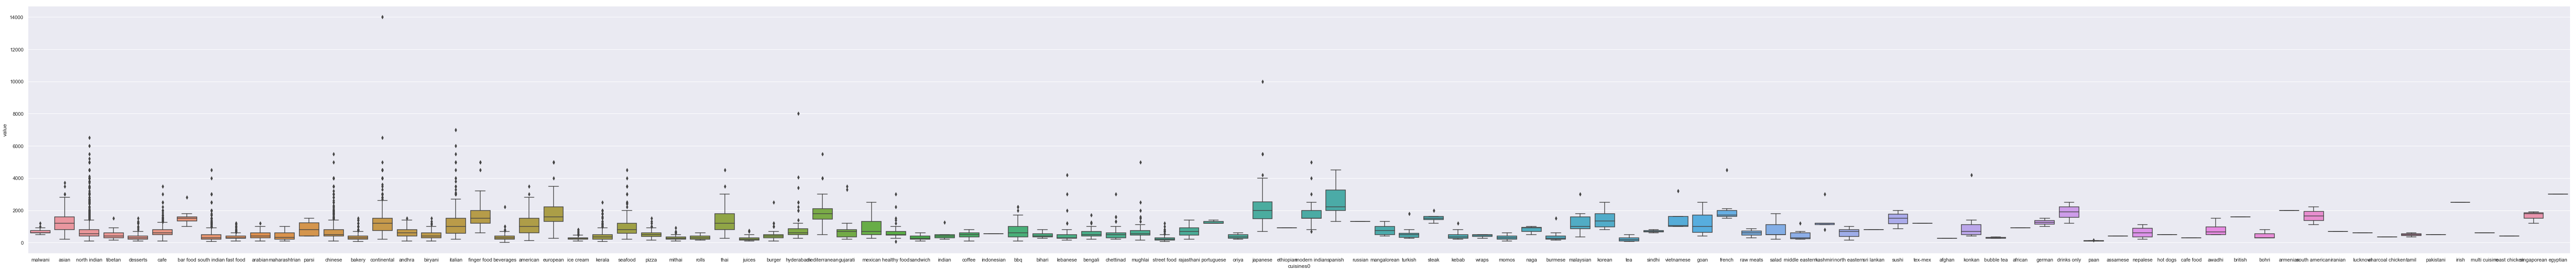

In [288]:
df=pd.melt(frame1,id_vars=['cuisines0'],value_vars=["cost"])
plt.figure(figsize=(100,10))
sns.boxplot(x='cuisines0',y='value',data=df)
plt.show()

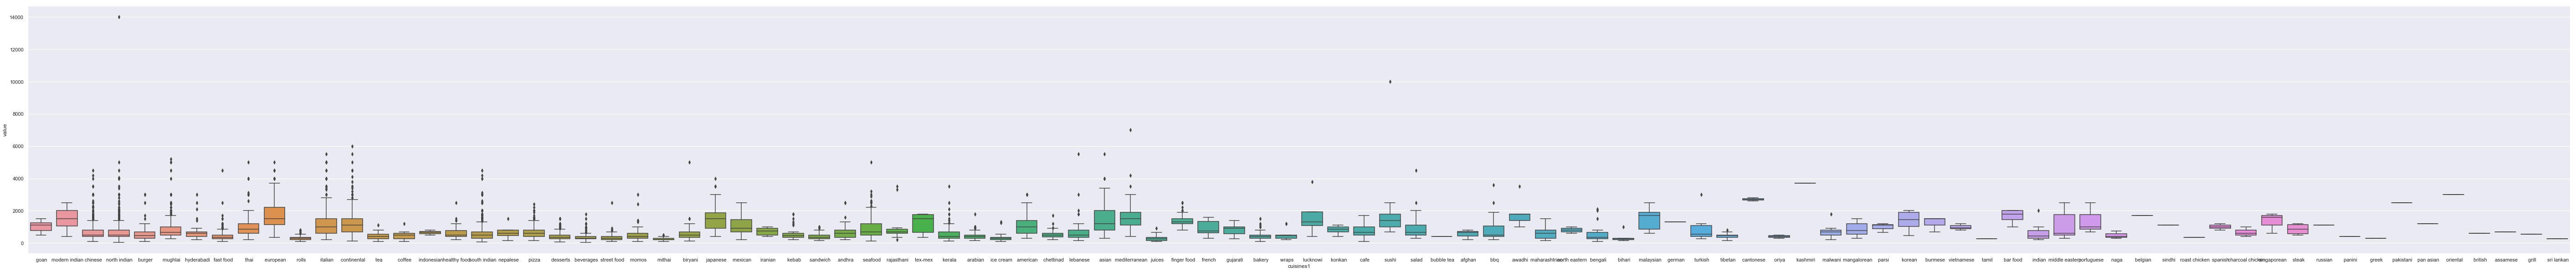

In [292]:
df=pd.melt(frame1,id_vars=['cuisines1'],value_vars=["cost"])
plt.figure(figsize=(100,10))
sns.boxplot(x='cuisines1',y='value',data=df)
plt.show()

In [52]:
'''
sns.countplot(y='cuisines0',data=frame1)
plt.figure(figsize=(30,30))
sns.set(rc={'figure.figsize':(30,30)})
figsize=(30,30)
plt.show()
'''

"\nsns.countplot(y='cuisines0',data=frame1)\nplt.figure(figsize=(30,30))\nsns.set(rc={'figure.figsize':(30,30)})\nfigsize=(30,30)\nplt.show()\n"

In [53]:
'''
sns.countplot(y='cuisines1',data=frame1)
plt.figure(figsize=(30,30))
sns.set(rc={'figure.figsize':(30,30)})
figsize=(30,30)
plt.show()
'''

"\nsns.countplot(y='cuisines1',data=frame1)\nplt.figure(figsize=(30,30))\nsns.set(rc={'figure.figsize':(30,30)})\nfigsize=(30,30)\nplt.show()\n"

In [24]:
frame1.columns
frame1['city']=frame1['city'].str.replace(" ","").str.strip(".")


In [25]:
test1.columns
test1['city']=test1['city'].str.replace(" ","").str.strip(".")


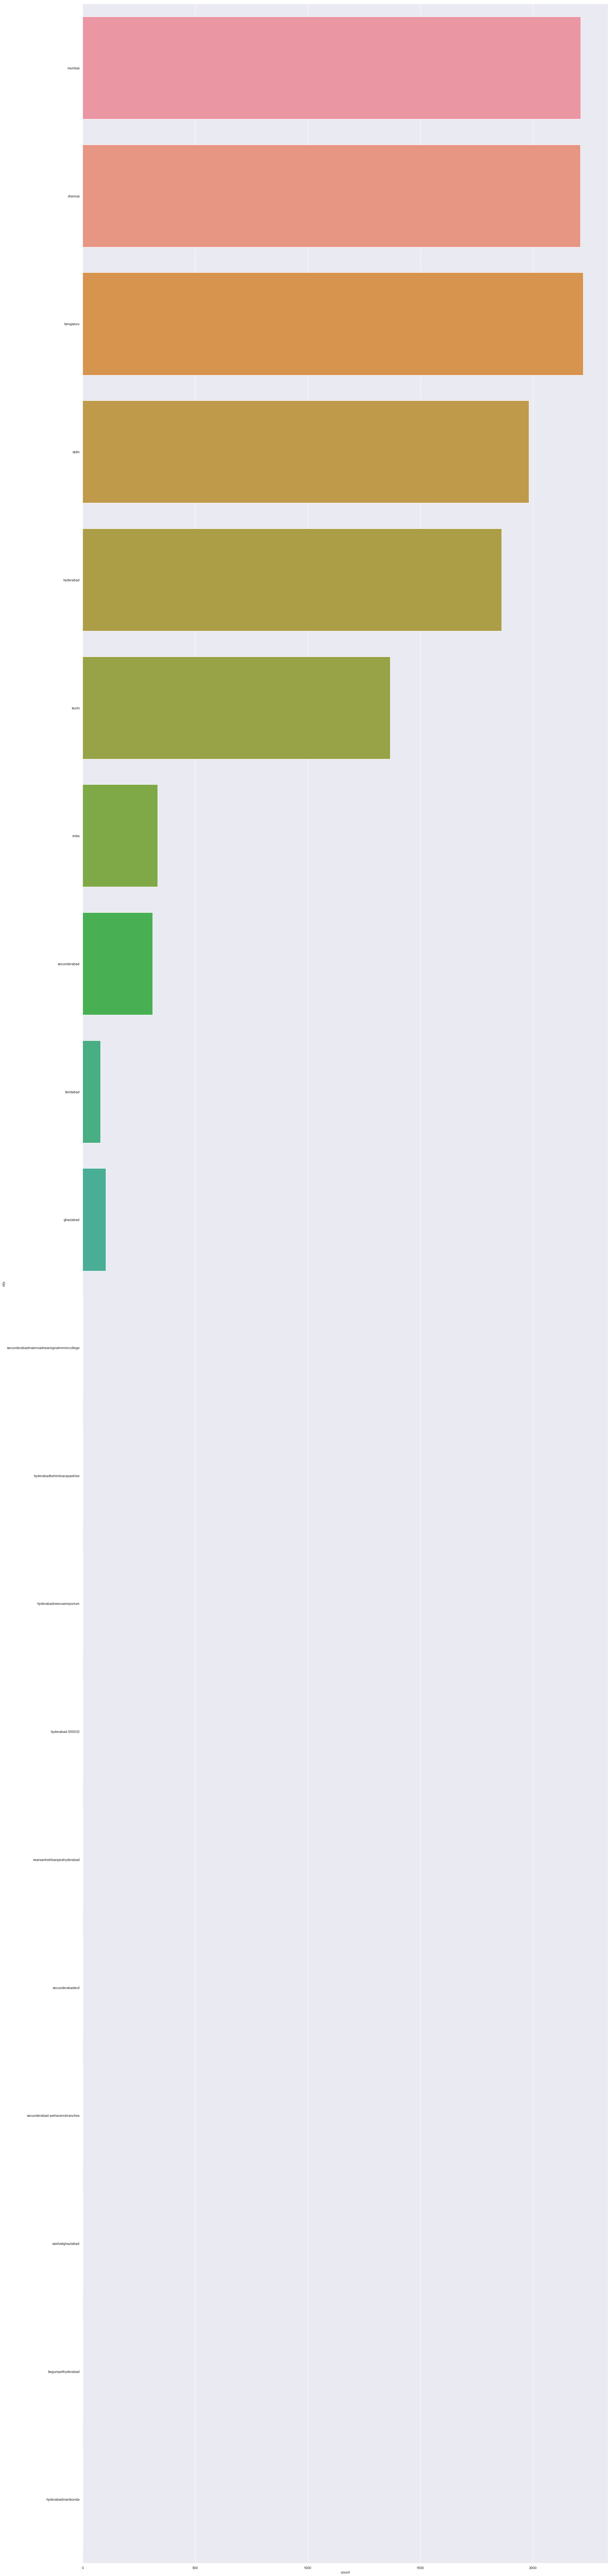

In [241]:
plt.figure(figsize=(30,150))
sns.set(rc={'figure.figsize':(30,50)})
sns.countplot(y='city', data=frame1)
plt.show()

In [26]:
frame1.loc[frame1.city.str.contains("thane",na=False),"city"]="mumbai"
frame1.loc[frame1.city.str.contains("mumbai",na=False),"city"]="mumbai"
frame1.loc[frame1.city.str.contains("east",na=False),"city"]="mumbai"
frame1.loc[frame1.city.str.contains("west",na=False),"city"]="mumbai"
frame1.loc[frame1.city.str.contains("east",na=False),"city"]="mumbai"
frame1.loc[frame1.city.str.contains("maharas",na=False),"city"]="mumbai"
frame1.loc[frame1.city.str.contains("powai",na=False),"city"]="mumbai"

frame1.loc[frame1.city.str.contains("gurga",na=False),"city"]="delhi"
frame1.loc[frame1.city.str.contains("guru",na=False),"city"]="delhi"
frame1.loc[frame1.city.str.contains("delhi",na=False),"city"]="delhi"
frame1.loc[frame1.city.str.contains("noida",na=False),"city"]="delhi"
frame1.loc[frame1.city.str.contains("noida",na=False),"city"]="delhi"

frame1.loc[frame1.city.str.contains("kochi",na=False),"city"]="kochi"
frame1.loc[frame1.city.str.contains("palari",na=False),"city"]="kochi"
frame1.loc[frame1.city.str.contains("ernakulam",na=False),"city"]="kochi"
frame1.loc[frame1.city.str.contains("edappa",na=False),"city"]="kochi"
frame1.loc[frame1.city.str.contains("trivan",na=False),"city"]="kochi"
frame1.loc[frame1.city.str.contains("thiruvanan",na=False),"city"]="kochi"
frame1.loc[frame1.city.str.contains("kakkanad",na=False),"city"]="kochi"
frame1.loc[frame1.city.str.contains("aluva",na=False),"city"]="kochi"
frame1.loc[frame1.city.str.contains("kerala",na=False),"city"]="kochi"
frame1.loc[frame1.city.str.contains("kaloor",na=False),"city"]="kochi"
frame1.loc[frame1.city.str.contains("aluva",na=False),"city"]="kochi"


frame1.loc[frame1.city.str.contains("telangana",na=False),"city"]="hyderabad"
frame1.loc[frame1.city.str.contains("madhapur",na=False),"city"]="hyderabad"
frame1.loc[frame1.city.str.contains("telangana",na=False),"city"]="hyderabad"
frame1.loc[frame1.city.str.contains("hills",na=False),"city"]="hyderabad"
frame1.loc[frame1.city.str.contains("telangana",na=False),"city"]="hyderabad"
frame1.loc[frame1.city.str.contains("kondapur",na=False),"city"]="hyderabad"
frame1.loc[frame1.city.str.contains("gachi",na=False),"city"]="hyderabad"


frame1.loc[frame1.city.str.contains("bangalore",na=False),"city"]="bengaluru"
frame1.loc[frame1.city.str.contains("banglore",na=False),"city"]="bengaluru"
frame1.loc[frame1.city.str.contains("banglaore",na=False),"city"]="bengaluru"
frame1.loc[frame1.city.str.contains("bengalore",na=False),"city"]="bengaluru"
frame1.loc[frame1.city.str.contains("bangalore",na=False),"city"]="bengaluru"


frame1.loc[frame1.city.str.contains("chennai",na=False),"city"]="chennai"
frame1.loc[frame1.city.str.contains("tamil",na=False),"city"]="chennai"
frame1.loc[frame1.city.str.contains("chennai",na=False),"city"]="chennai"
frame1.loc[frame1.city.str.contains("kilpauk",na=False),"city"]="chennai"




In [27]:
test1.loc[test1.city.str.contains("thane",na=False),"city"]="mumbai"
test1.loc[test1.city.str.contains("mumbai",na=False),"city"]="mumbai"
test1.loc[test1.city.str.contains("east",na=False),"city"]="mumbai"
test1.loc[test1.city.str.contains("west",na=False),"city"]="mumbai"
test1.loc[test1.city.str.contains("east",na=False),"city"]="mumbai"
test1.loc[test1.city.str.contains("maharas",na=False),"city"]="mumbai"
test1.loc[test1.city.str.contains("powai",na=False),"city"]="mumbai"

test1.loc[test1.city.str.contains("gurga",na=False),"city"]="delhi"
test1.loc[test1.city.str.contains("guru",na=False),"city"]="delhi"
test1.loc[test1.city.str.contains("delhi",na=False),"city"]="delhi"
test1.loc[test1.city.str.contains("noida",na=False),"city"]="delhi"
test1.loc[test1.city.str.contains("noida",na=False),"city"]="delhi"

test1.loc[test1.city.str.contains("kochi",na=False),"city"]="kochi"
test1.loc[test1.city.str.contains("palari",na=False),"city"]="kochi"
test1.loc[test1.city.str.contains("ernakulam",na=False),"city"]="kochi"
test1.loc[test1.city.str.contains("edappa",na=False),"city"]="kochi"
test1.loc[test1.city.str.contains("trivan",na=False),"city"]="kochi"
test1.loc[test1.city.str.contains("thiruvanan",na=False),"city"]="kochi"
test1.loc[test1.city.str.contains("kakkanad",na=False),"city"]="kochi"
test1.loc[test1.city.str.contains("aluva",na=False),"city"]="kochi"
test1.loc[test1.city.str.contains("kerala",na=False),"city"]="kochi"
test1.loc[test1.city.str.contains("kaloor",na=False),"city"]="kochi"
test1.loc[test1.city.str.contains("aluva",na=False),"city"]="kochi"


test1.loc[test1.city.str.contains("telangana",na=False),"city"]="hyderabad"
test1.loc[test1.city.str.contains("madhapur",na=False),"city"]="hyderabad"
test1.loc[test1.city.str.contains("telangana",na=False),"city"]="hyderabad"
test1.loc[test1.city.str.contains("hills",na=False),"city"]="hyderabad"
test1.loc[test1.city.str.contains("telangana",na=False),"city"]="hyderabad"
test1.loc[test1.city.str.contains("kondapur",na=False),"city"]="hyderabad"
test1.loc[test1.city.str.contains("gachi",na=False),"city"]="hyderabad"


test1.loc[test1.city.str.contains("bangalore",na=False),"city"]="bengaluru"
test1.loc[test1.city.str.contains("banglore",na=False),"city"]="bengaluru"
test1.loc[test1.city.str.contains("banglaore",na=False),"city"]="bengaluru"
test1.loc[test1.city.str.contains("bengalore",na=False),"city"]="bengaluru"
test1.loc[test1.city.str.contains("bangalore",na=False),"city"]="bengaluru"


test1.loc[test1.city.str.contains("chennai",na=False),"city"]="chennai"
test1.loc[test1.city.str.contains("tamil",na=False),"city"]="chennai"
test1.loc[test1.city.str.contains("chennai",na=False),"city"]="chennai"
test1.loc[test1.city.str.contains("kilpauk",na=False),"city"]="chennai"




In [215]:
"""
plt.figure(figsize=(30,150))
sns.set(rc={'figure.figsize':(30,50)})
sns.countplot(y='city', data=frame1)
""" 

"\nplt.figure(figsize=(30,150))\nsns.set(rc={'figure.figsize':(30,50)})\nsns.countplot(y='city', data=frame1)\n"

In [29]:
list1=frame1.groupby("city").count()["title"].sort_values(ascending=False).index[0:9].tolist()

In [30]:
list2=test1.groupby("city").count()["title"].sort_values(ascending=False).index[0:9].tolist()

In [31]:
list1

['bengaluru',
 'mumbai',
 'chennai',
 'delhi',
 'hyderabad',
 'kochi',
 'secunderabad',
 'ghaziabad',
 'faridabad']

In [32]:
list2

['mumbai',
 'bengaluru',
 'chennai',
 'delhi',
 'hyderabad',
 'kochi',
 'secunderabad',
 'ghaziabad',
 'faridabad']

In [33]:
pat = r'(\b{}\b)'.format('|'.join(list1))
frame1.loc[~frame1.city.str.contains(pat, case=False, na=False),"city"]="india"

pat1 = r'(\b{}\b)'.format('|'.join(list2))
test1.loc[~test1.city.str.contains(pat1, case=False, na=False),"city"]="india"

C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


Empty DataFrame
Columns: [title, restaurant_id, cuisines, time, city, locality, rating, votes, subtitle, cuisines0, cuisines1, cuisines2, cuisines3, cuisines4, cuisines5, cuisines6, cuisines7, cuisinesi]
Index: []

In [71]:
#test1[test1.city=="india"]

In [346]:
"""plt.figure(figsize=(30,150))
sns.set(rc={'figure.figsize':(30,150)})
sns.countplot(y='locality', data=frame1)
plt.show()"""

"plt.figure(figsize=(30,150))\nsns.set(rc={'figure.figsize':(30,150)})\nsns.countplot(y='locality', data=frame1)\nplt.show()"

In [34]:
frame1.columns

Index(['title', 'restaurant_id', 'cuisines', 'time', 'city', 'locality',
       'rating', 'votes', 'cost', 'subtitle', 'cuisines0', 'cuisines1',
       'cuisines2', 'cuisines3', 'cuisines4', 'cuisines5', 'cuisines6',
       'cuisines7', 'cuisinesi'],
      dtype='object')

In [37]:
frame1["new"]=0
frame1.loc[frame1.rating=="NEW","new"]=1

In [38]:
test1["new"]=0
test1.loc[test1.rating=="NEW","new"]=1

In [39]:
from numpy import nan

frame1.loc[frame1.new==1,"rating"]=0
frame1.loc[frame1.new==1,"votes"]=0

In [40]:
from numpy import nan

test1.loc[test1.new==1,"rating"]=0
test1.loc[test1.new==1,"votes"]=0


In [34]:
#frame1.votes=frame1.votes.str.split(" ")[0]
frame1["votes"]=frame1['votes'].str.split(' ', 1, expand=True)[0]

In [35]:
#test1.votes=test1.votes.str.split(" ")[0]
test1["votes"]=test1['votes'].str.split(' ', 1, expand=True)[0]


In [36]:
frame1.votes=frame1.votes.astype(float)

In [37]:
test1.votes=test1.votes.astype(float)

In [41]:
frame1.rating.replace("-",0,inplace=True)
frame1.rating=frame1.rating.astype(float)

In [42]:
test1.rating.replace("-",0,inplace=True)
test1.rating=test1.rating.astype(float)

In [40]:
"""
frame1["score"]=np.multiply(frame1.rating,frame1.votes)
test1["score"]=np.multiply(test1.rating,test1.votes)
"""

In [41]:
"""
frame1.loc[frame1.score.isnull(),"score"]=0
test1.loc[test1.score.isnull(),"score"]=0
"""

In [ ]:
'''
import numpy as np
#mean=np.mean(frame1.score)
#std=np.std(frame1.score)
#frame1.score=frame1.score-mean
#frame1.score=frame1.score/std

min=frame1['score'].min()
max=frame1['score'].max()

frame1['score'] = (frame1['score'] - min) / ( max-min)

#frame1.score= frame1.score.apply(lambda x: (x - np.mean(x)) / np.std(x))'''

In [613]:
'''import numpy as np
#mean=np.mean(test1.score)
#std=np.std(test1.score)
#test1.score=test1.score-mean
#test1.score=test1.score/std

min=test1['score'].min()
max=test1['score'].max()

test1['score'] = (test1['score'] - min) / ( max-min)

#test1.score= test1.score.apply(lambda x: (x - np.mean(x)) / np.std(x)) '''


In [1]:
frame1.columns

NameError: name 'frame1' is not defined

In [46]:
test1.columns

Index(['title', 'restaurant_id', 'cuisines', 'time', 'city', 'locality',
       'rating', 'votes', 'subtitle', 'cuisines0', 'cuisines1', 'cuisines2',
       'cuisines3', 'cuisines4', 'cuisines5', 'cuisines6', 'cuisines7',
       'cuisinesi', 'new', 'score'],
      dtype='object')

In [42]:
frame1.drop(columns =['restaurant_id', 'cuisines',"time",
       'locality', 'rating', 'votes', 'subtitle', 'cuisines0',
       'cuisines1', 'cuisines2', 'cuisines3', 'cuisines4', 'cuisines5',
       'cuisines6', 'cuisines7'], inplace = True)

In [43]:
test1.drop(columns =['restaurant_id', 'cuisines',"time",
       'locality', 'rating', 'votes', 'subtitle', 'cuisines0',
       'cuisines1', 'cuisines2', 'cuisines3', 'cuisines4', 'cuisines5',
       'cuisines6', 'cuisines7'], inplace = True)

## Backup partially cleaned cv

In [49]:
frame1.to_csv("wrangled2f1.csv")
test1.to_csv("wrangled2t1.csv").


In [71]:
frame1=pd.read_csv("wrangled2f1.csv")
test1=pd.read_csv("wrangled2t1.csv")

In [70]:
test1.title.unique()

array(['casual dining', 'quick bites', 'none', 'bar', 'beverage shop',
       'café', 'bakery', 'dhaba', 'fine dining', 'food court', 'mess',
       'club', 'paan shop', 'bhojanalya'], dtype=object)

In [72]:
frame1.title.unique()

array(['casual dining', 'bar', 'quick bites', 'café', 'none',
       'beverage shop', 'fine dining', 'bakery', 'food court', 'mess',
       'club', 'dhaba', 'paan shop'], dtype=object)

In [53]:
test1.describe(include=['object'])

title    city     cuisinesi
count          4231    4231          4231
unique           14      12            25
top     quick bites  mumbai  north indian
freq           1732     749           997

In [52]:
frame1.describe(include=['object'])

title       city     cuisinesi
count         12690      12690         12690
unique           13         20            30
top     quick bites  bengaluru  north indian
freq           5191       2223          2983

In [444]:
frame1=pd.read_csv("wrangled2f1.csv")
test1=pd.read_csv("wrangled2t1.csv")

In [63]:
print(frame1.isnull().sum())
print(test1.isnull().sum())

title        0
city         0
cost         0
cuisinesi    0
new          0
score        0
dtype: int64
title        0
city         0
cuisinesi    0
new          0
score        0
dtype: int64


In [46]:
print(frame1["title"].unique())

print(test1["title"].unique())

['casual dining' 'bar' 'quick bites' 'café' 'none' 'beverage shop'
 'fine dining' 'bakery' 'food court' 'mess' 'club' 'dhaba' 'paan shop']
['casual dining' 'quick bites' 'none' 'bar' 'beverage shop' 'café'
 'bakery' 'dhaba' 'fine dining' 'food court' 'mess' 'club' 'paan shop']


In [45]:
test1.loc[test1.title.str.contains("bhojanalya",na=False),"title"]="casual dining"

In [52]:
print(frame1["city"].unique())

print(test1["city"].unique())

['mumbai' 'chennai' 'bengaluru' 'delhi' 'hyderabad' 'kochi' 'india'
 'secunderabad' 'faridabad' 'ghaziabad']
['delhi' 'mumbai' 'faridabad' 'kochi' 'hyderabad' 'chennai' 'bengaluru'
 'ghaziabad' 'india' 'secunderabad']


In [48]:
frame1.loc[frame1.city.str.contains("secunderabad",na=False),"city"]="secunderabad"
frame1.loc[frame1.city.str.contains("hyderabad",na=False),"city"]="hyderabad"
frame1.loc[frame1.city.str.contains("ghaziabad",na=False),"city"]="ghaziabad"


test1.loc[test1.city.str.contains("secunderabad",na=False),"city"]="secunderabad"
test1.loc[test1.city.str.contains("hyderabad",na=False),"city"]="hyderabad"

In [51]:
frame1["cuisinesi"].replace('', 'north indian', inplace=True)
test1["cuisinesi"].replace('', 'north indian', inplace=True)

In [49]:
print(frame1["cuisinesi"].unique())

print(test1["cuisinesi"].unique())

['north indian' 'asian' 'chinese' 'ice cream' 'american' 'cafe'
 'middle eastern' 'south indian' 'fast food' 'bakery' 'european' 'drinks'
 'seafood' 'beverages' 'ethiopian' 'mexican' 'street food' ''
 'healthy food' 'charcoal chicken' 'paan' 'drinks only' 'belgian' 'bohri'
 'south american' 'fusion' 'greek' 'multi cuisine' 'raw meats' 'grill']
['north indian' 'american' 'south indian' 'ice cream' 'fast food'
 'chinese' 'european' 'beverages' 'cafe' 'asian' 'bakery' 'drinks only'
 'middle eastern' 'street food' 'mexican' 'grill' 'seafood' 'healthy food'
 'drinks' 'german' 'charcoal chicken' 'cantonese' 'hawaiian' 'paan' '']


In [54]:

frame1["cuisinesi"].replace('ethiopian', 'middle eastern', inplace=True)
frame1["cuisinesi"].replace("charcoal chicken", 'middle eastern', inplace=True)
frame1["cuisinesi"].replace("drinks only", 'drinks', inplace=True)
frame1["cuisinesi"].replace("belgian", 'european', inplace=True)
frame1["cuisinesi"].replace("bohri", 'middle eastern', inplace=True)
frame1["cuisinesi"].replace("greek", 'european', inplace=True)
frame1["cuisinesi"].replace("grill", 'middle eastern', inplace=True)


test1["cuisinesi"].replace('drinks only', 'drinks', inplace=True)
test1["cuisinesi"].replace("grill", 'middle eastern', inplace=True)
test1["cuisinesi"].replace("german", 'european', inplace=True)
test1["cuisinesi"].replace("charcoal chicken", 'middle eastern', inplace=True)
test1["cuisinesi"].replace("charcoal chicken", 'middle eastern', inplace=True)
test1["cuisinesi"].replace("cantonese", 'chinese', inplace=True)
test1["cuisinesi"].replace("hawaiian", 'american', inplace=True)

In [55]:
frame1.to_csv("wrangled033f1.csv")
test1.to_csv("wrangled033t1.csv")

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

import os

os.chdir(r"C:\Users\Gnaneeswar\Desktop\Hackathons\Predict Restaurant Food Prices")
os.getcwd()

frame1=pd.read_csv("wrangled033f1.csv")
test1=pd.read_csv("wrangled033t1.csv")

In [2]:
len(frame1["cuisinesi"].unique())

22

## Start here

In [3]:
frame1.columns

Index(['Unnamed: 0', 'title', 'restaurant_id', 'cuisines', 'time', 'city',
       'locality', 'rating', 'votes', 'cost', 'subtitle', 'cuisines0',
       'cuisines1', 'cuisines2', 'cuisines3', 'cuisines4', 'cuisines5',
       'cuisines6', 'cuisines7', 'cuisinesi', 'new'],
      dtype='object')

In [4]:
test1.columns

Index(['Unnamed: 0', 'title', 'restaurant_id', 'cuisines', 'time', 'city',
       'locality', 'rating', 'votes', 'subtitle', 'cuisines0', 'cuisines1',
       'cuisines2', 'cuisines3', 'cuisines4', 'cuisines5', 'cuisines6',
       'cuisines7', 'cuisinesi', 'new'],
      dtype='object')

In [5]:
tempp=frame1.cost

In [6]:
frame1=frame1.drop(columns=['Unnamed: 0','votes', 'cost', 'cuisines','subtitle', 'cuisines0', 'cuisines1',
       'cuisines2', 'cuisines3', 'cuisines4', 'cuisines5', 'cuisines6',
       'cuisines7','time','locality'])


In [7]:
test1=test1.drop(columns=['Unnamed: 0','votes', 'cuisines','subtitle', 'cuisines0', 'cuisines1',
       'cuisines2', 'cuisines3', 'cuisines4', 'cuisines5', 'cuisines6',
       'cuisines7','time','locality'])

In [8]:
frame1.columns

Index(['title', 'restaurant_id', 'city', 'rating', 'cuisinesi', 'new'], dtype='object')

In [9]:
test1.columns

Index(['title', 'restaurant_id', 'city', 'rating', 'cuisinesi', 'new'], dtype='object')

In [10]:
concat_df = pd.concat([frame1 , test1])

In [11]:
#concat_df=pd.get_dummies(concat_df, columns=['title',"city","cuisinesi"] )

In [12]:
concat_df.columns

Index(['title', 'restaurant_id', 'city', 'rating', 'cuisinesi', 'new'], dtype='object')

In [13]:
all_titles=concat_df["title"].unique().tolist()
all_cities=concat_df["city"].unique().tolist()
all_cuisines=concat_df["cuisinesi"].unique().tolist()

In [14]:
from sklearn.preprocessing import LabelEncoder
le_titles = LabelEncoder()
le_cuisines = LabelEncoder()
le_city = LabelEncoder()

le_titles.fit(all_titles)
le_cuisines.fit(all_cuisines)
le_city.fit(all_cities)

LabelEncoder()

In [15]:
concat_df['title'] = le_titles.transform(concat_df['title'])
concat_df['cuisinesi'] = le_cuisines.transform(concat_df['cuisinesi'])
concat_df['city'] = le_city.transform(concat_df['city'])

In [15]:
concat_df.to_csv("concated8.csv")

In [16]:
concat_df=concat_df.reset_index(drop=True)

In [17]:
df_train=concat_df.loc[range(0,12690),:]

In [18]:
df_test=concat_df.loc[range(12690,len(concat_df)),:]

In [19]:
df_train.loc[df_train["rating"].isnull(),"rating"]=0
df_test.loc[df_test["rating"].isnull(),"rating"]=0

In [20]:
#df_test.dtypes

In [20]:
len(df_test.columns)

6

In [21]:
print(df_train.columns)

Index(['title', 'restaurant_id', 'city', 'rating', 'cuisinesi', 'new'], dtype='object')


In [22]:
print(df_test.columns)

Index(['title', 'restaurant_id', 'city', 'rating', 'cuisinesi', 'new'], dtype='object')


In [23]:
X = df_train[['title', 'restaurant_id', 'city', 'rating', 'cuisinesi', 'new']]


y = tempp

In [24]:
len(tempp)

12690

In [25]:
XX=df_test[['title', 'restaurant_id', 'city', 'rating', 'cuisinesi', 'new']]

In [27]:
import numpy as np
import pandas as pd
import os

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.001, random_state = 100)

In [29]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

XX_sc=sc.transform(XX)

y_train = y_train.values.reshape((len(y_train), 1)) 
y_train_sc = sc.fit_transform(y_train)
y_train_sc = y_train_sc.ravel()

y_test = y_test.values.reshape((len(y_test), 1)) 
y_test_sc = sc.fit_transform(y_test)
y_test_sc = y_test_sc.ravel()

In [38]:
model_dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=30)
model_dt.fit(X_train_sc, y_train_sc)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [44]:
np.arange(1,20,4)

array([ 1,  5,  9, 13, 17])

Depth =  1


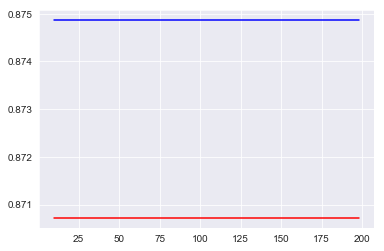

Depth =  6


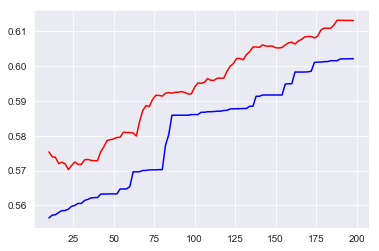

Depth =  11


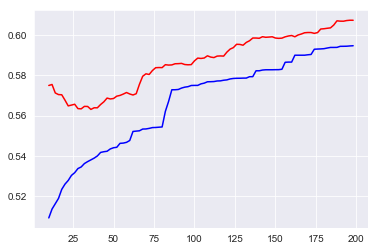

Depth =  16


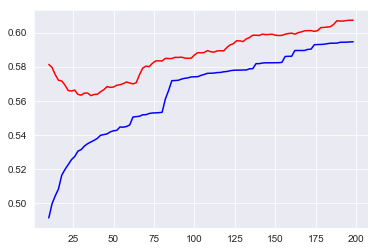

Depth =  21


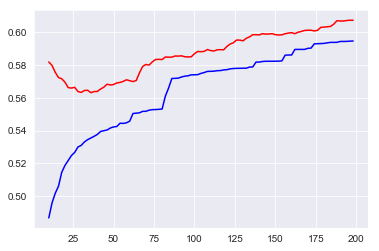

Depth =  26


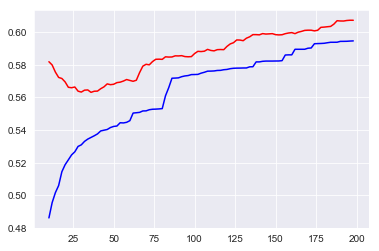

Depth =  31


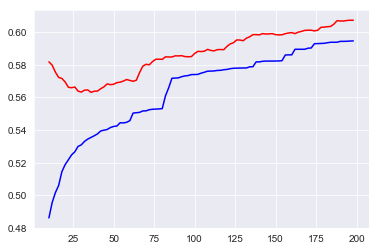

Depth =  36


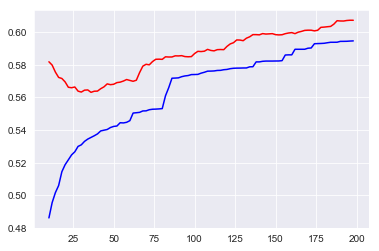

In [56]:
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

depth = np.arange(1,40,5)
minleaf=np.arange(10,200,2)

for i in depth:
    
    trainscore=[]
    cvscore=[]
    for j in minleaf:
        
        model_dt = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        model_dt.fit(X_train_sc, y_train_sc)

        # training rmse
        y_p_sc = model_dt.predict(X_train_sc)
        trainscore.append(np.sqrt(np.mean((np.array(y_train_sc)-np.array(y_p_sc))**2))) #RMSE
                                  
        cv_score = cross_val_score(model_dt, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
        cv_score = np.sqrt(np.abs(cv_score))

        cvscore.append(np.mean(cv_score))
    
    print("Depth = ",i)                      
    plt.plot(minleaf,trainscore,"b",label="Trainscore")
    plt.plot(minleaf,cvscore,"r",label="CVscore")
    plt.show()
               




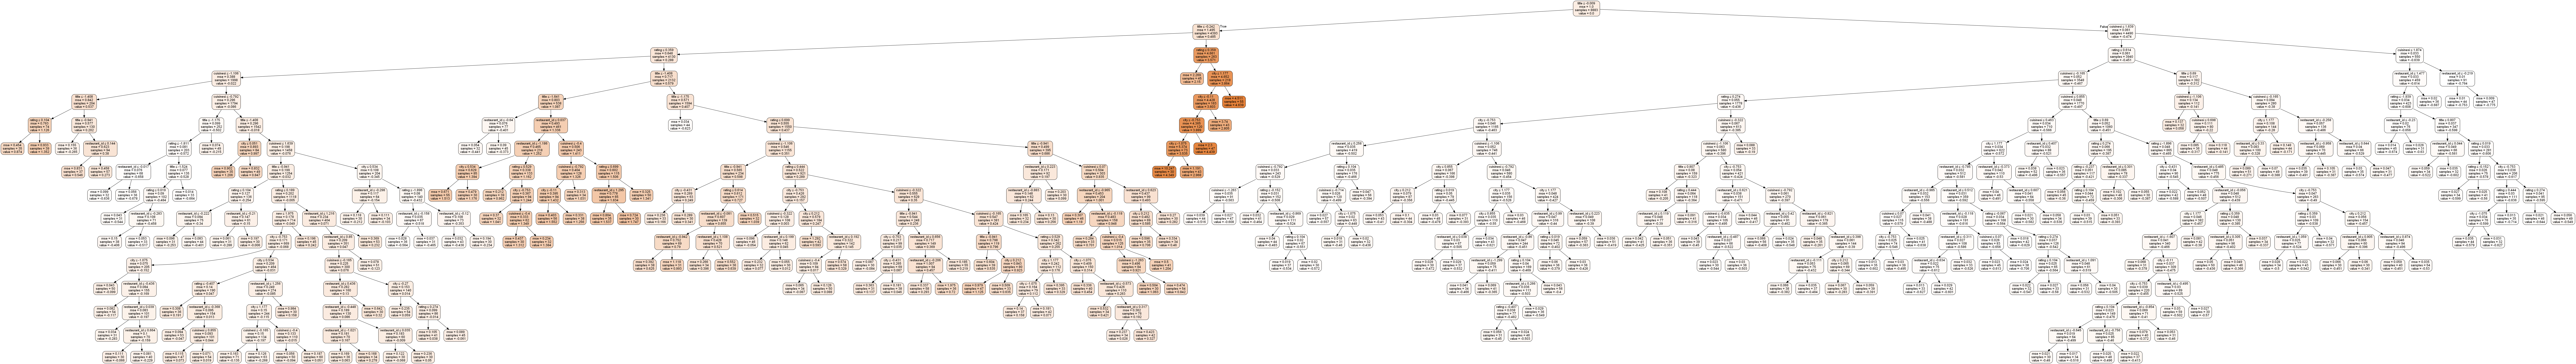

In [168]:
import os
os.environ['PATH'].split(os.pathsep)
os.environ['PATH']+=os.pathsep+r"C:\Users\Gnaneeswar\Desktop\Praxis\Python\graphviz-2.38\release\bin"

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

feature_names = [ 'title', 'restaurant_id', 'city', 'rating', 'cuisinesi', 'new']

dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=feature_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [33]:
'''y_train=y_train.astype("float")
y_test=y_test.astype("float")'''

'y_train=y_train.astype("float")\ny_test=y_test.astype("float")'

In [40]:
# training rmse

y_p_sc = model_dt.predict(X_train_sc)
np.sqrt(np.mean((np.array(y_train_sc)-np.array(y_p_sc))**2)) #RMSE

0.5314943324281156

In [295]:
# testing rmse

y_pred_sc = model_dt.predict(X_test_sc)
np.sqrt(np.mean((np.array(y_test_sc)-np.array(y_pred_sc))**2)) #RMSE

0.6025802677464701

In [37]:
#import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

In [38]:
X_train.shape

(8883, 6)

In [41]:
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model_dt, X_train_sc, y_train_sc, cv=10, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))


#Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_sc,y_p_sc)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))



Model Report
RMSE : 0.5315
CV Score : Mean - 0.5621 | Std - 0.06914 | Min - 0.4934 | Max - 0.7432


In [145]:
yy=sc.inverse_transform(model_dt.predict(XX_sc))

In [296]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_train_sc, y_p_sc)

In [297]:
coefficient_of_dermination 

0.7172144581724454

In [154]:
np.savetxt("05submit.csv", yy, delimiter=",")

In [210]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.01, random_state = 100)



from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

XX_sc=sc.transform(XX)

y_train = y_train.values.reshape((len(y_train), 1)) 
y_train_sc = sc.fit_transform(y_train)
y_train_sc = y_train_sc.ravel()

y_test = y_test.values.reshape((len(y_test), 1)) 
y_test_sc = sc.fit_transform(y_test)
y_test_sc = y_test_sc.ravel()

estimator =  10


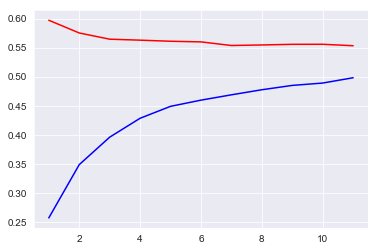

estimator =  20


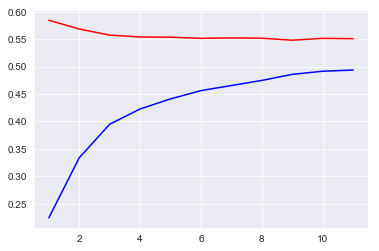

estimator =  30


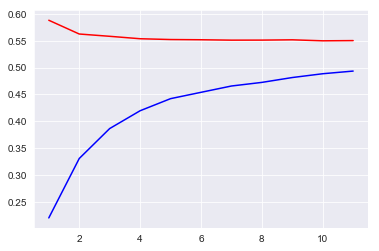

estimator =  40


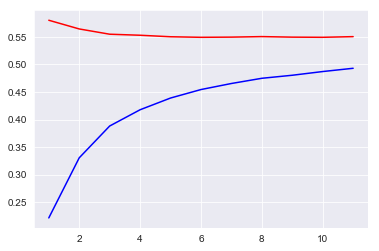

estimator =  50


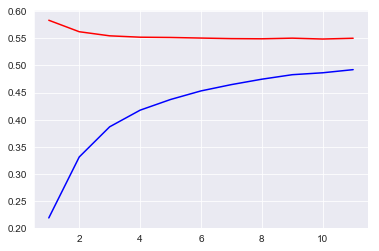

estimator =  60


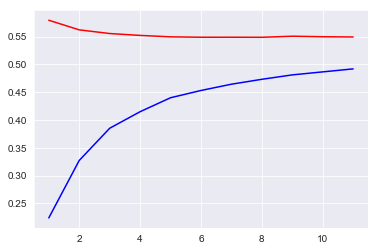

estimator =  70


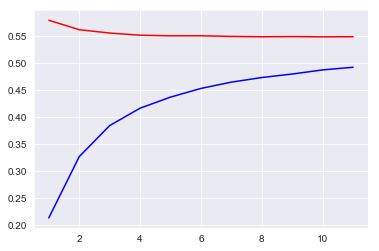

estimator =  80


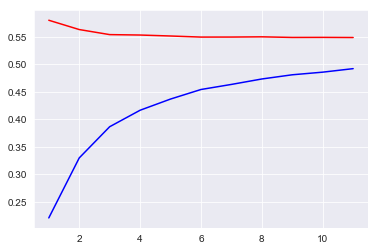

estimator =  90


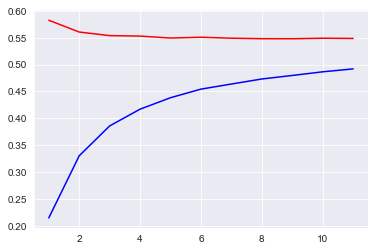

'\nestimators = np.arange(10, 200, 5)\nscores = []\nfor n in estimators:\n    model.set_params(n_estimators=n)\n    model.fit(X_train_sc, y_train_sc)\n    scores.append(model.score(X_test_sc, y_test_sc))\nplt.title("Effect of n_estimators")\nplt.xlabel("n_estimator")\nplt.ylabel("score")\nplt.plot(estimators, scores)\n\n'

In [80]:
#model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=500)
#model.fit(X_train, y_train)


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

estimator = np.arange(10,100,10)
minleaf=np.arange(1,12,1)

for i in estimator:
    
    trainscore=[]
    cvscore=[]
    
    for j in minleaf:
        
        model = RandomForestRegressor(n_jobs=-1,n_estimators=i,min_samples_leaf=j)
        model.fit(X_train_sc, y_train_sc)

        
        # training rmse
        y_p_sc = model.predict(X_train_sc)
        trainscore.append(np.sqrt(np.mean((np.array(y_train_sc)-np.array(y_p_sc))**2))) #RMSE
                                  
        cv_score = cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
        cv_score = np.sqrt(np.abs(cv_score))

        cvscore.append(np.mean(cv_score))
    
    print("estimator = ",i)                      
    plt.plot(minleaf,trainscore,"b",label="Trainscore")
    plt.plot(minleaf,cvscore,"r",label="CVscore")
    plt.show()
               

"""
estimators = np.arange(10, 200, 5)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train_sc, y_train_sc)
    scores.append(model.score(X_test_sc, y_test_sc))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

"""


In [60]:
trainscore
cvscore


[0.5477135645427809,
 0.5494022066247066,
 0.5547482363884649,
 0.55881832125883,
 0.567924383664568,
 0.5733039867184121,
 0.577347000985426,
 0.5812394309604554,
 0.5857634061006846,
 0.5875855217789641,
 0.593380105296503,
 0.5966555773553178,
 0.5997213813791156,
 0.5994308932502436,
 0.6000113084657464,
 0.6010185332447937,
 0.6028391119837827,
 0.6129865220506194,
 0.6302561524479834]

In [75]:
#help(RandomForestRegressor)

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model, X_train_sc, y_train_sc, cv=5, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))

y_p_sc = model.predict(X_train_sc)
np.sqrt(np.mean((np.array(y_train_sc)-np.array(y_p_sc))**2)) #RMSE

#Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_sc,y_p_sc)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))



Model Report
RMSE : 0.4716
CV Score : Mean - 0.5483 | Std - 0.05426 | Min - 0.4896 | Max - 0.6368


In [74]:
model = RandomForestRegressor(n_jobs=-1,n_estimators=90,min_samples_leaf=8)
model.fit(X_train_sc, y_train_sc)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [76]:
y_p_sc = model.predict(X_train_sc)
np.sqrt(np.mean((np.array(y_train_sc)-np.array(y_p_sc))**2)) #RMSE

0.4716200796792414

In [77]:
y_pred_sc = model.predict(X_test_sc)
np.sqrt(np.mean((np.array(y_test_sc)-np.array(y_pred_sc))**2)) #RMSE

0.8338251647818611

In [79]:
from sklearn.metrics import r2_score

r2_score(y_train_sc, y_p_sc)

0.777574500443346

In [159]:
model.set_params(n_estimators=120)
model.fit(X_train_sc, y_train_sc)

yy=sc.inverse_transform(model.predict(XX_sc))

In [160]:
np.savetxt("06submit.csv", yy, delimiter=",")

In [187]:
#

In [217]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.01, random_state = 100)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

XX_sc=sc.transform(XX)

y_train = y_train.values.reshape((len(y_train), 1)) 
y_train_sc = sc.fit_transform(y_train)
y_train_sc = y_train_sc.ravel()

y_test = y_test.values.reshape((len(y_test), 1)) 
y_test_sc = sc.fit_transform(y_test)
y_test_sc = y_test_sc.ravel()

In [218]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor( loss = 'huber',learning_rate=0.001,n_estimators=350, max_depth=6
                              ,subsample=1,
                              verbose=False,random_state=126)   # Leaderboard SCORE :  0.8364249755816828 @ RS =126 ,n_estimators=350, max_depth=6

gbr.fit(X_train,y_train)

#y_pred1 = sc.inverse_transform(gbr.predict(X_test))

#y_pred_gbr = pd.DataFrame(y_pred_gbr, columns = ['COST']) # Converting to dataframe
#print(y_pred_gbr)
#y_pred_gbr.to_excel("GradientBoostingRegressor.xlsx", index = False ) # Saving the output in to an excel

C:\Users\Gnaneeswar\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.001, loss='huber', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=350,
                          n_iter_no_change=None, presort='auto',
                          random_state=126, subsample=1, tol=0.0001,
                          validation_fraction=0.1, verbose=False,
                          warm_start=False)

In [219]:
y_p_sc = gbr.predict(X_train_sc)
np.sqrt(np.mean((np.array(y_train_sc)-np.array(y_p_sc))**2)) #RMSE

596.8237190412154

In [220]:
y_pred_sc = gbr.predict(X_test_sc)
np.sqrt(np.mean((np.array(y_test_sc)-np.array(y_pred_sc))**2)) #RMSE

588.8862512252581

<Figure size 2880x432 with 0 Axes>

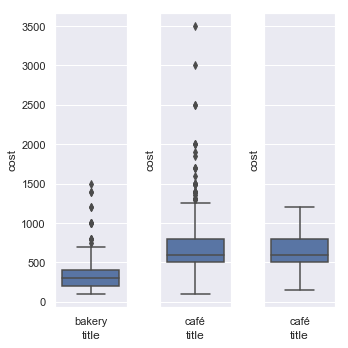

In [162]:
plt.figure(1)

fig, axes = pyplot.subplots(ncols=3, figsize=(5, 5), sharey=True)

sns.boxplot(x='title',y='cost',data=frame[frame.title=="bakery"],ax=axes[0])

sns.boxplot(x='title',y='cost',data=frame[frame.title=="café"],ax=axes[1])

sns.boxplot(x='title',y='cost',data=frame[(frame.title=="café")&(frame.subtitle=="bakery")],ax=axes[2])

plt.tight_layout()

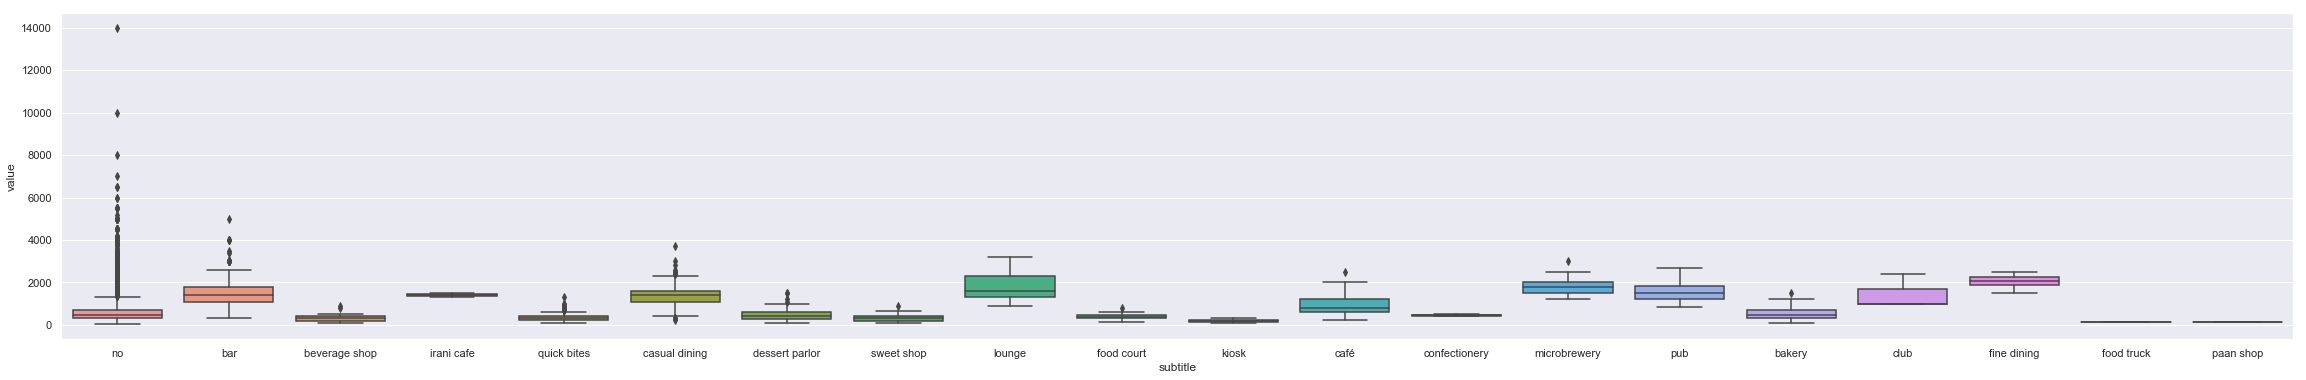

In [136]:
import seaborn as sns
from matplotlib import pyplot

sns.set(rc={'figure.figsize':(40,6)})


df=pd.melt(frame,id_vars=['subtitle'],value_vars=["cost"])
sns.boxplot(x='subtitle',y='value',data=df)
